## **Proyecto Integrador**

In [1]:
#Carga de librerias que usaremos a lo largo del proyecto 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **Avance 1**

In [2]:
#Cargamos el archivo .csv para obtener toda la informacion necesaria para realizar los analisis, y este archivo
#se guarda en la variable data. 

data = pd.read_csv ("data_latinoamerica.csv",sep=",")

In [3]:
#Comprobamos que el dataset cargado tiene la cantidad de registros y columnas especificadas

np.shape(data)

(12216057, 50)

In [4]:
#De los datos completos de latinoamerica nos piden enfocar el analisis en solo 6 paises donde se expandiran 
#llamamos a la columna country_name para tener un panorama general de los paises y como esta esta escrita su nomenclatura 
#esto nos ayuda a no cometer errores en el filtrafo de datos.

data ["country_name"].value_counts()

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Venezuela               24775
Ecuador                 24775
Guatemala               22793
Uruguay                 19820
Honduras                18829
Paraguay                18829
Nicaragua               17838
Cuba                    17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

In [5]:
# Lista de países a filtrar
paises_filtrar = ['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina', 'Chile']

# Filtrar el DataFrame
data_latinoamerica = data.loc[data['country_name'].isin(paises_filtrar)]



In [6]:
# Verificar el resultado del filtro
print(data_latinoamerica ["country_name"].value_counts())

country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64


In [7]:
#Ahora procedemos a la limpieza de datos enfocandonos en los datos nulos, para ello usaremos este scrip que nos muestra
#la sama total de datos nulos que existen en cada columna. 

data_latinoamerica.isnull().sum()

location_key                                    0
date                                            0
country_code                                    0
country_name                                    0
new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689


In [8]:
#analizando el print en la seccion de codigo anterior, podemos apreciar que hay un conjunto de datos con una cantidad considerable de
# valores nulos en varias columnas, por lo cual procederemos a realizar otro filtro, esta vez por location_key 

data_latinoamerica ["location_key"].value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_147       991
AR_A_140       991
AR_A_133       991
AR_A_126       991
AR_A_119       991
Name: count, Length: 12079, dtype: int64

In [9]:
#filtramo por la nomenclatura oficial de cada pais "AR","CL","CO","MX","PE","BR"

data_latinoamerica_paises = data_latinoamerica[data_latinoamerica["location_key"].isin(["AR","CL","CO","MX","PE","BR"])]

data_latinoamerica_paises.shape  #verificamos la cantidad que datos que nos quedan despues del ultimo filtro realizado a location_key

(5946, 50)

In [10]:
#Realizamos el filtro requerido por fecha mayores a 2021-01-01

data_latinoamerica_paises_Fecha = data_latinoamerica_paises[data_latinoamerica_paises["date"]>="2021-01-01"]

data_latinoamerica_paises_Fecha.shape # Verificamos el tamaño despues del filtrado

(3750, 50)

In [11]:
data_latinoamerica_paises_Fecha["location_key"].value_counts()

location_key
AR    625
BR    625
CL    625
CO    625
MX    625
PE    625
Name: count, dtype: int64

In [12]:
# Mostrar el total de valores nulos por columna
nulos_por_columna = data_latinoamerica_paises_Fecha.isnull().sum()
print(nulos_por_columna)

# Mostrar solo las columnas que tienen valores nulos
valores_nulos_fechas = nulos_por_columna[nulos_por_columna > 0]
print(valores_nulos_fechas)

location_key                                0
date                                        0
country_code                                0
country_name                                0
new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
population                                  0
population_male                             0
population_female                           0
population_rural                            0
population_urban                            0
population_density                          0
human_development_index                     0
population_age_00_09                        0
population_age_10_19                        0
population_age_20_29                        0
population_age_30_39                        0
population_age_40_49                        0
population_age_50_59              

In [13]:
print(valores_nulos_fechas)

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     589
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2119
cumulative_recovered                     2740
dtype: int64


In [14]:
# Lista de columnas a rellenar con el promedio por país, exceptuando las columnas cumulative_vaccine_doses_administered,new_recovered, 
# cumulative_recovered que requerian de un analisis diferente

columnas_a_rellenar = [
    "new_confirmed",                             
    "new_deceased",                               
    "cumulative_confirmed",                       
    "cumulative_deceased",                             
    "average_temperature_celsius",                
    "minimum_temperature_celsius",                
    "maximum_temperature_celsius",                
    "rainfall_mm",                                
    "relative_humidity",               
]

# Bucle para cada país en la lista de países
for pais in paises_filtrar:
    mask = data_latinoamerica_paises_Fecha["country_name"] == pais
    
    # Bucle para cada columna en la lista de columnas a rellenar con el promedio
    for columna in columnas_a_rellenar:
        promedio_pais = round(data_latinoamerica_paises_Fecha.loc[mask, columna].mean())
        data_latinoamerica_paises_Fecha.loc[mask, columna] = data_latinoamerica_paises_Fecha.loc[mask, columna].fillna(promedio_pais)

In [15]:
#sustituimos los NA por 0 en las columnas cumulative_vaccine_doses_administered,new_recovered, cumulative_recovered, ya que estas tienen
#una cantidad considerables de nulos y el enfoque de rellenar con promedios no aplica.

data_latinoamerica_paises_Fecha.loc[:,"cumulative_vaccine_doses_administered"] = data_latinoamerica_paises_Fecha["cumulative_vaccine_doses_administered"].fillna(0)
data_latinoamerica_paises_Fecha.loc[:,"new_recovered"] = data_latinoamerica_paises_Fecha["new_recovered"].fillna(0)
data_latinoamerica_paises_Fecha.loc[:,"cumulative_recovered"] = data_latinoamerica_paises_Fecha["cumulative_recovered"].fillna(0)





In [16]:

#Verificamos que los bucles cumplieron su funcion y ya no tenemos valores nulos en el DataFrame

print(data_latinoamerica_paises_Fecha.isnull().sum()[data_latinoamerica_paises_Fecha.isnull().sum()>0])

Series([], dtype: int64)


In [17]:
#analizando los datos, se pudo apreciar que hay valores negativos en las columnas new_recovered y new_confirmed, para solucionarlo
# Se aplicar valor absoluto a las columnas

data_latinoamerica_paises_Fecha.loc[:, 'new_recovered'] = data_latinoamerica_paises_Fecha['new_recovered'].abs()
data_latinoamerica_paises_Fecha.loc[:, 'new_confirmed'] = data_latinoamerica_paises_Fecha['new_confirmed'].abs()


In [18]:
#Se Aplica bucles for para el cálculo de estadísticas descriptivas y otras métricas importantes que ofrece pandas por default
#para realizar un vistazo general de los datos

for i in data_latinoamerica_paises_Fecha.columns:
    print(i)
    print(data_latinoamerica_paises_Fecha[i].describe())
    print ("-------------------------------------------")

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
-------------------------------------------
date
count           3750
unique           625
top       2022-09-17
freq               6
Name: date, dtype: object
-------------------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
-------------------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
-------------------------------------------
new_confirmed
count      3750.00000
mean      13910.56560
std       24203.69884
min           0.00000
25%        1538.25000
50%        5199.50000
75%       14827.75000
max      298408.00000
Name: new_confirmed, dtype: float64
-------------------------------------------
new_deceased
count     3750.000000
mean       277.023467
std        507.000461
min          0.0000

**1.¿Qué implican estas métricas y cómo pueden ayudar en el análisis de datos?**

Estas metricas nos dan un vistazo a grandes rasgos de los datos, las métricas como la media, la mediana, y la desviación estándar indican tendencias y variabilidad en los datos. Por ejemplo, una alta desviación estándar en new_confirmed sugiere gran variabilidad en los casos reportados, lo cual podría reflejar diferencias en la gravedad de la pandemia entre países o en la calidad del reporte.

**2.¿Se muestran todas las estadísticas en todas las columnas durante el análisis?**

No, no se muestran todas las estadísticas en todas las columnas.

**3.¿Cuál es la razón de la respuesta anterior y cómo podría afectar la interpretación de los resultados obtenidos?**

Algunas columnas, como las categóricas (ej. country_name), tiene un type STR,y no se le pueden realizar operaciones matematicas. La falta de ciertas estadísticas en columnas no numéricas garantiza que el análisis se mantenga relevante y preciso, evitando interpretaciones incorrectas de los datos. 

In [19]:
#Creamos una funcion que solo muestre los valores numericos y no los categoricos, ademas solo incluimos la moda, mediana, rango y varianza

def describir_datos(data):
    for i in data.columns:
        if data[i].dtype == "float64" or data[i].dtype =="int64":
            print(i)
            print("Mediana", data[i].median())
            print("Varianza", data[i].var())
            print("Rango", data[i].max()-data[i].min())
            print("Mode", data[i].mode()[0])
            print("-----------------------------------------")

describir_datos(data_latinoamerica_paises_Fecha)

new_confirmed
Mediana 5199.5
Varianza 585819037.5303714
Rango 298408.0
Mode 0.0
-----------------------------------------
new_deceased
Mediana 101.0
Varianza 257049.467574002
Rango 11447.0
Mode 0.0
-----------------------------------------
cumulative_confirmed
Mediana 3628681.5
Varianza 63766275903629.41
Rango 34567862.0
Mode 6093645.0
-----------------------------------------
cumulative_deceased
Mediana 139601.0
Varianza 33384243806.286003
Rango 685202.0
Mode 128994.0
-----------------------------------------
cumulative_vaccine_doses_administered
Mediana 32384815.0
Varianza 8545114516992615.0
Rango 347868481.0
Mode 0.0
-----------------------------------------
population
Mediana 47910798.0
Varianza 4507476512829145.0
Rango 194985406.0
Mode 17574003.0
-----------------------------------------
population_male
Mediana 22254165.0
Varianza 1101239470229229.0
Rango 95463769.0
Mode 8972014.0
-----------------------------------------
population_female
Mediana 23245825.0
Varianza 1189150601199

**1. Qué representa la mediana?**

La mediana representa el valor central de cada variable, que nos da una idea de un valor típico. Por ejemplo, si la mediana de cumulative_confirmed (casos confirmados acumulados) es 3,628,681.5, eso significa que la mitad de los registros tienen menos de ese número de casos acumulados y la otra mitad tiene más.

**2.¿Cómo varía la dispersión de los datos en el conjunto de datos analizado, en términos de la varianza y el rango?**

la dispersión de los datos varía considerablemente entre las diferentes variables. Por ejemplo, gdp_usd (PIB en dólares) tiene una varianza extremadamente alta, lo que indica una gran variabilidad entre las economías de los diferentes países o regiones. Por otro lado, variables como population_age_60_69 (población de 60-69 años) tienen una varianza mucho más baja, lo que sugiere menos variabilidad entre los registros.
El rango también varía mucho entre las variables. Un rango alto indica que los valores varían mucho, como en cumulative_confirmed, donde hay una diferencia significativa entre el valor más alto y el más bajo.

**3.¿Qué nos puede indicar esto sobre la consistencia o la variabilidad de los datos en relación con la mediana?**

Una alta varianza y un gran rango en relación con la mediana indican que los datos son muy variables y que hay una gran dispersión de valores en torno a la mediana. Esto puede significar que las situaciones, como el número de casos o la distribución de la población, son muy diferentes en distintos lugares o momentos.
Por otro lado, si la varianza y el rango son bajos, eso indica que los valores están más concentrados cerca de la mediana, sugiriendo mayor consistencia en los datos.

In [20]:
#Guardamos el archivo final con todos los filtros en un archivo csv para poderlo utilizar analisis posteriores sin tener que cargar 
#toda la data original, de esta manera optimizamos los recursos.

data_latinoamerica_paises_Fecha.to_csv("Datos_Finales_Filtrados.csv", index=False)

## **Avance 2**

In [1]:
#Carga de librerias que usaremos a lo largo del proyecto 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("Datos_Finales_Filtrados.csv", sep=",")


In [3]:
print(data.columns)

Index(['location_key', 'date', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 50 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3750 non-null   object 
 1   date                                   3750 non-null   object 
 2   country_code                           3750 non-null   object 
 3   country_name                           3750 non-null   object 
 4   new_confirmed                          3750 non-null   float64
 5   new_deceased                           3750 non-null   float64
 6   cumulative_confirmed                   3750 non-null   float64
 7   cumulative_deceased                    3750 non-null   float64
 8   cumulative_vaccine_doses_administered  3750 non-null   float64
 9   population                             3750 non-null   float64
 10  population_male                        3750 non-null   float64
 11  popu

In [5]:
# Lista de columnas para convertir de float64 a int
columnas_convertir = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'population', 'population_male',
    'population_female', 'population_rural', 'population_urban', 'population_density',
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older',
    'gdp_usd', 'gdp_per_capita_usd', 'area_sq_km', 'population_largest_city',
    'area_rural_sq_km', 'area_urban_sq_km', 'new_recovered', 'cumulative_recovered'
]

# Convertir las columnas de float64 a int y la columna date en tipo datetime
data[columnas_convertir] = data[columnas_convertir].astype(int)
data['date'] = pd.to_datetime(data['date'])

# Verificar los tipos de datos después de la conversión
print(data.dtypes)

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
country_name                                     object
new_confirmed                                     int64
new_deceased                                      int64
cumulative_confirmed                              int64
cumulative_deceased                               int64
cumulative_vaccine_doses_administered             int64
population                                        int64
population_male                                   int64
population_female                                 int64
population_rural                                  int64
population_urban                                  int64
population_density                                int64
human_development_index                         float64
population_age_00_09                              int64
population_age_10_19                            

In [6]:
#Análisis Estadístico con Pandas y Numpy:
for i in data.columns:
    print(i)
    print(data[i].describe())
    print ("-------------------------------------------")

location_key
count     3750
unique       6
top         AR
freq       625
Name: location_key, dtype: object
-------------------------------------------
date
count                             3750
mean     2021-11-08 23:59:59.999999744
min                2021-01-01 00:00:00
25%                2021-06-06 00:00:00
50%                2021-11-09 00:00:00
75%                2022-04-14 00:00:00
max                2022-09-17 00:00:00
Name: date, dtype: object
-------------------------------------------
country_code
count     3750
unique       6
top         AR
freq       625
Name: country_code, dtype: object
-------------------------------------------
country_name
count          3750
unique            6
top       Argentina
freq            625
Name: country_name, dtype: object
-------------------------------------------
new_confirmed
count      3750.00000
mean      13910.56560
std       24203.69884
min           0.00000
25%        1538.25000
50%        5199.50000
75%       14827.75000
max      29

In [7]:
#creamos nuevasmente la variable de paises seleccionados ya que la seguiremos necesitando
paises_seleccionados = ['Brazil', 'Mexico', 'Peru', 'Colombia', 'Argentina', 'Chile']

In [8]:
#Convertimos la columna date en nuestro indice 

data.set_index ("date", inplace = True )

In [9]:
data.columns

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 

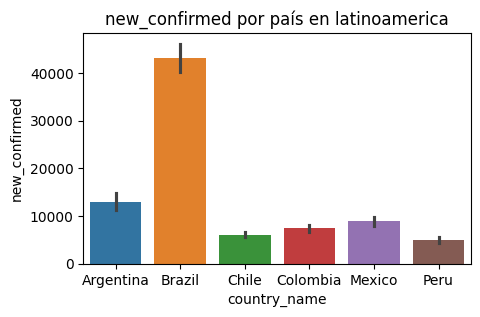

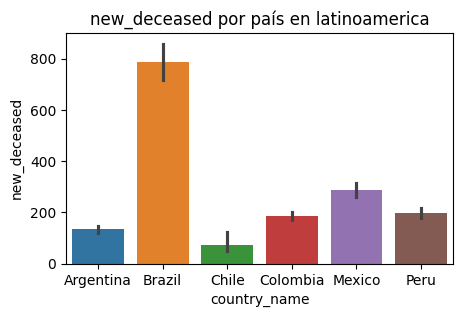

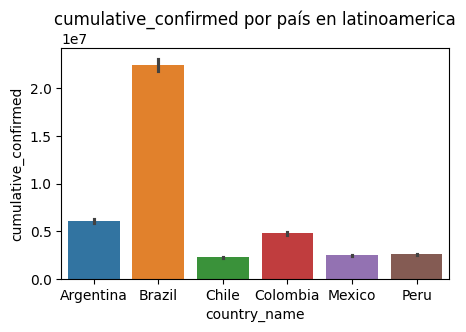

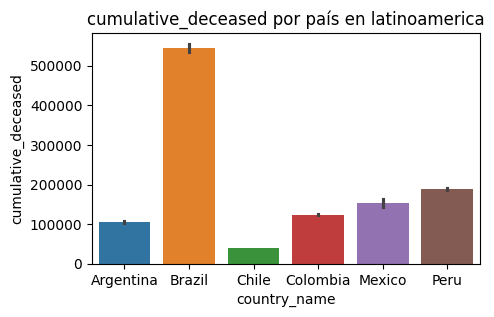

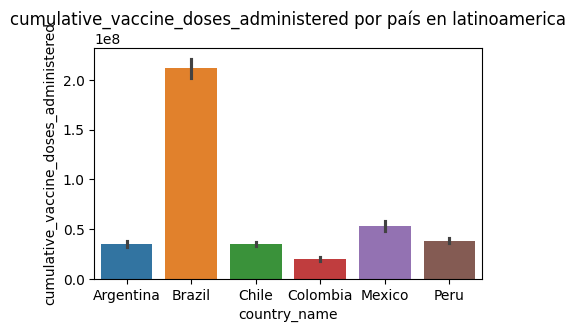

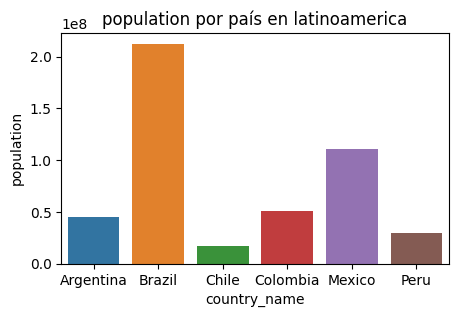

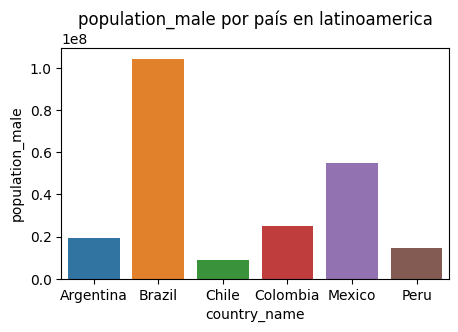

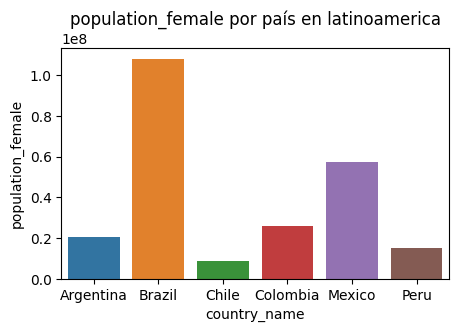

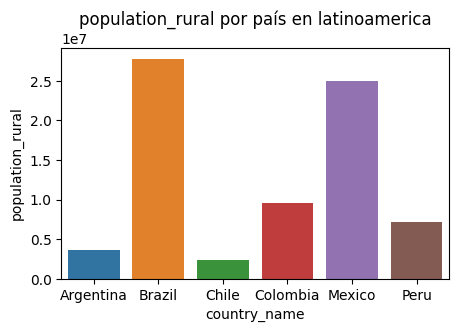

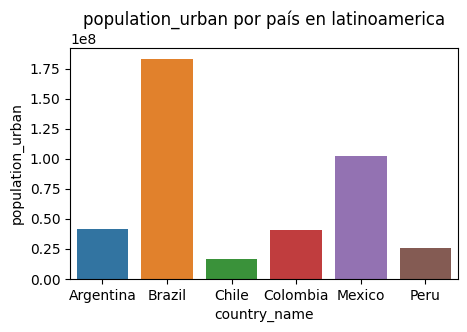

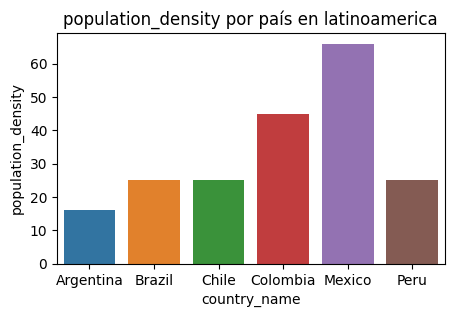

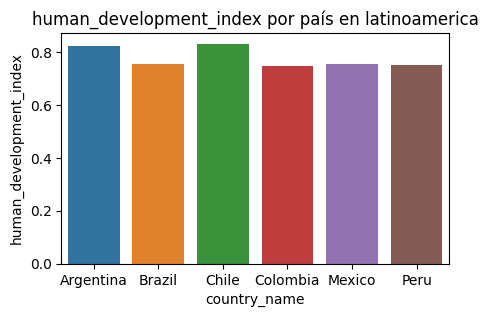

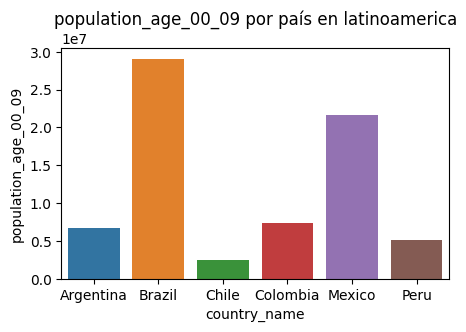

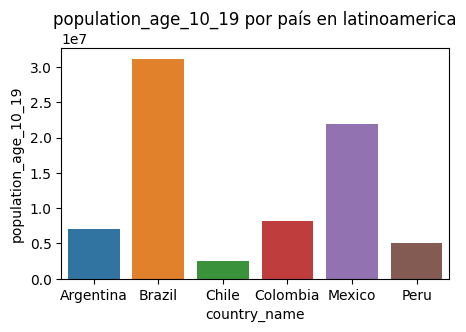

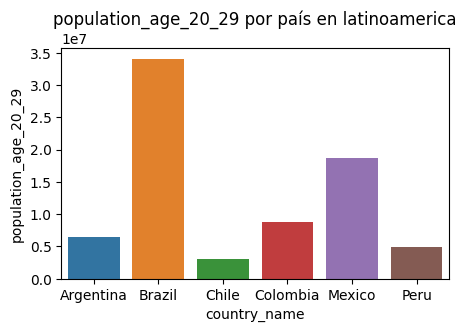

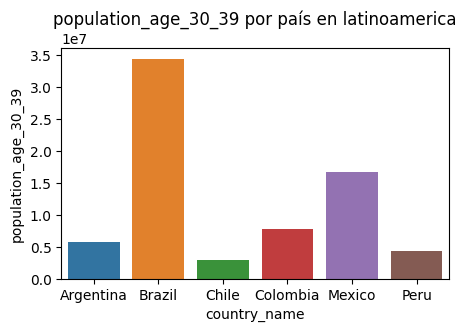

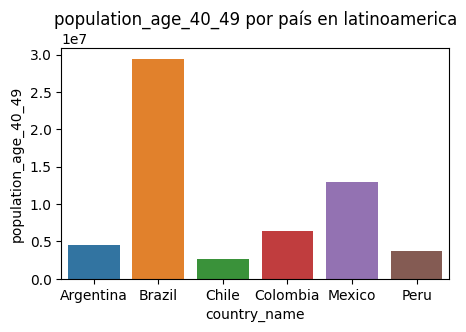

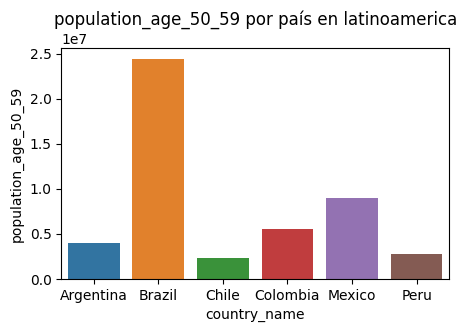

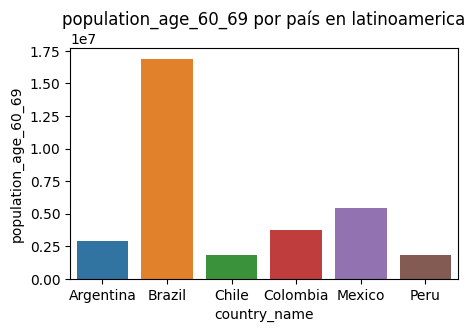

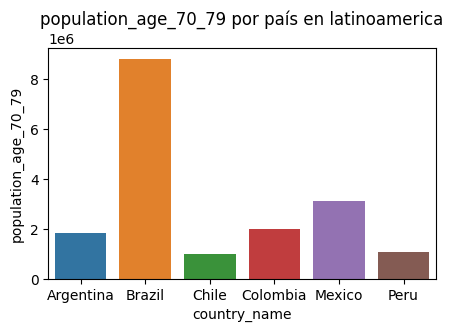

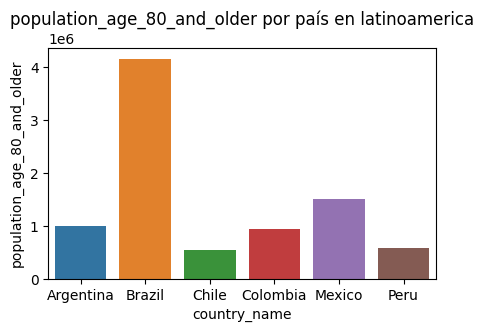

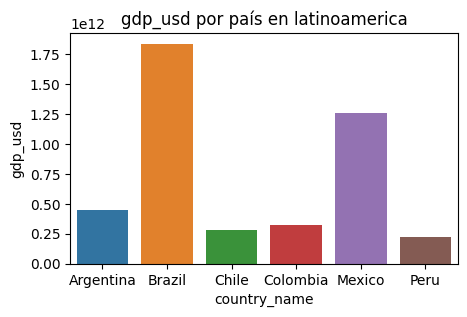

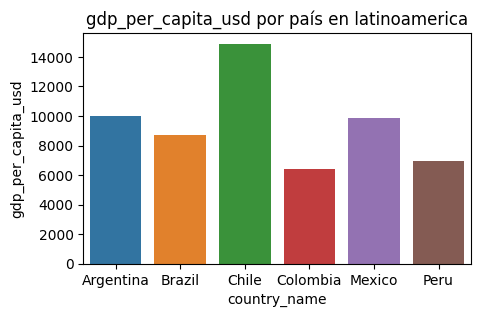

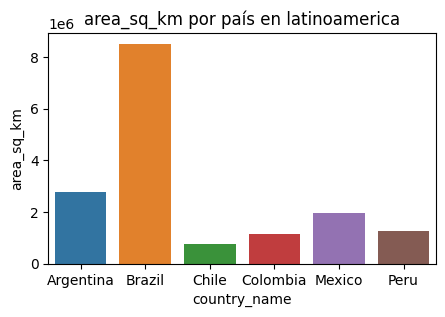

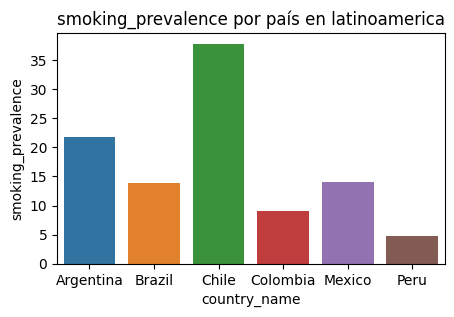

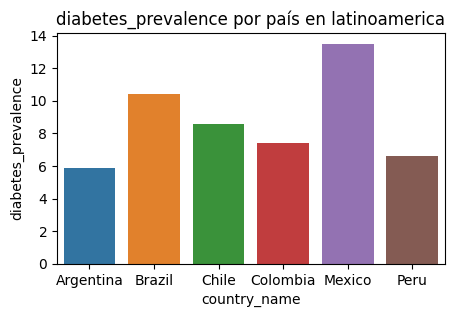

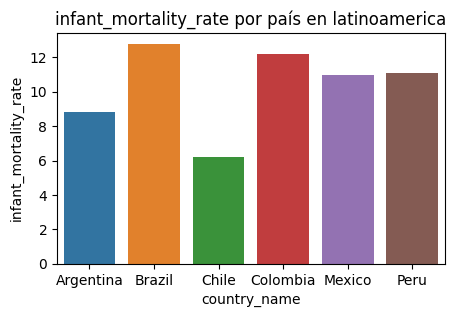

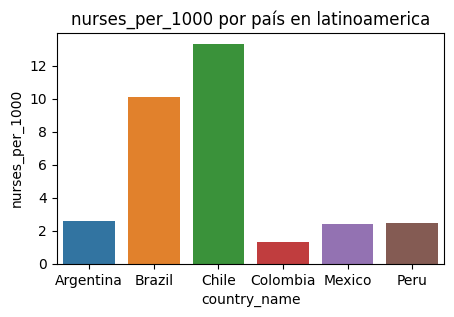

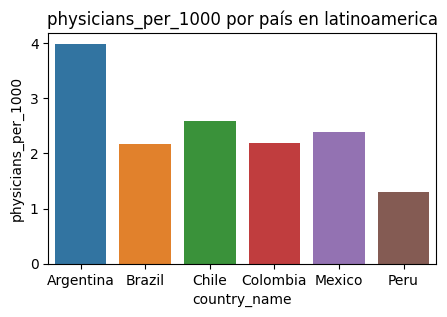

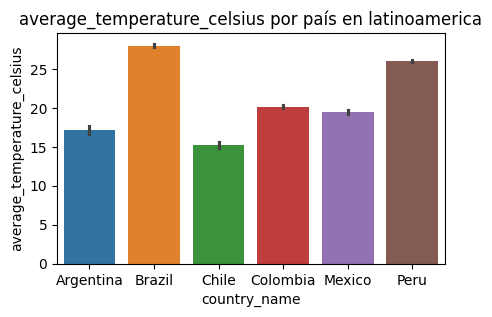

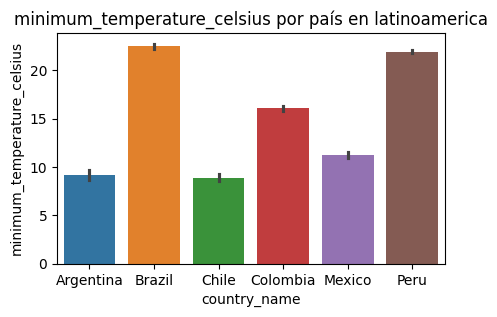

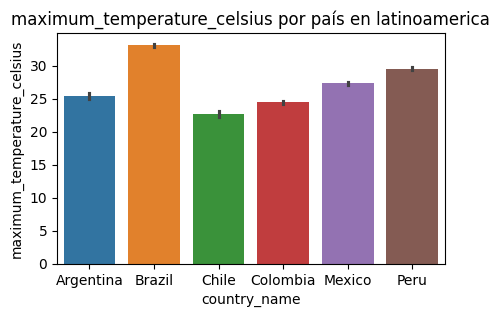

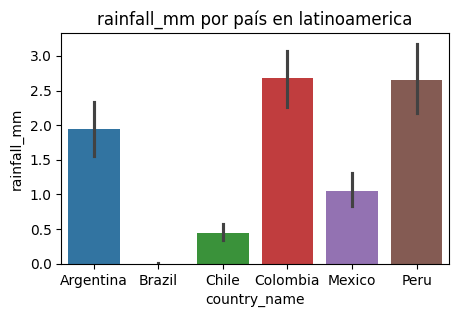

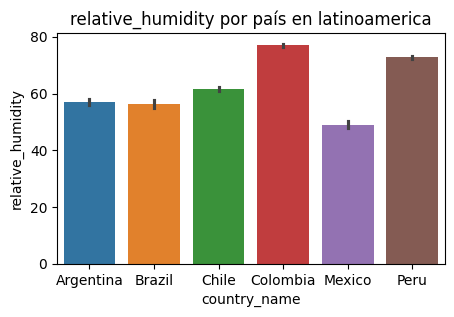

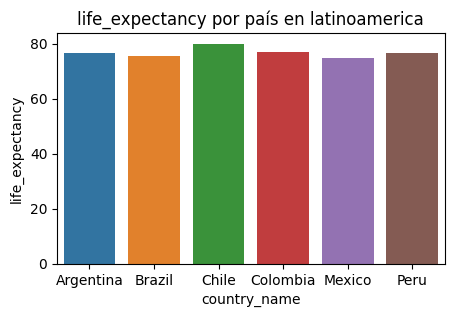

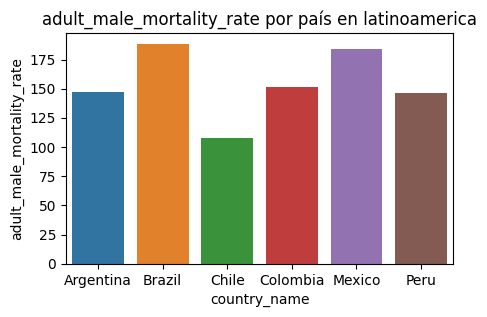

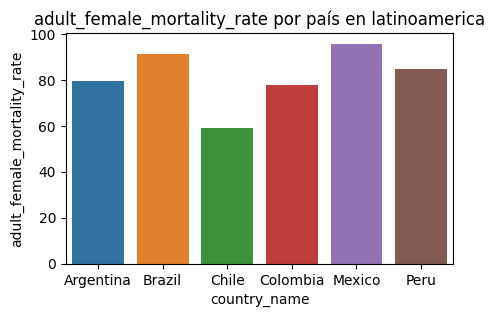

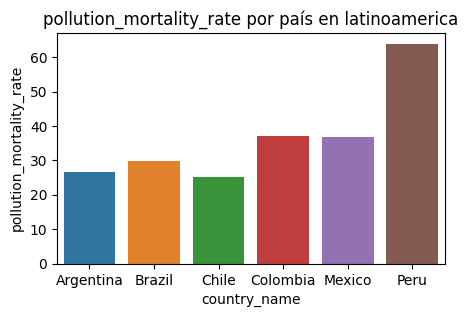

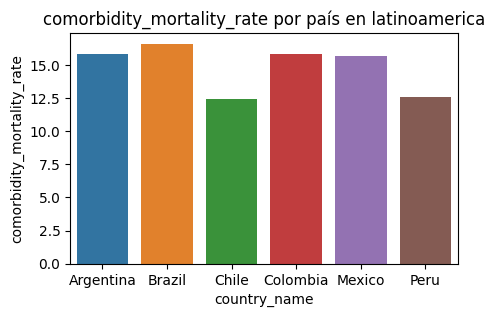

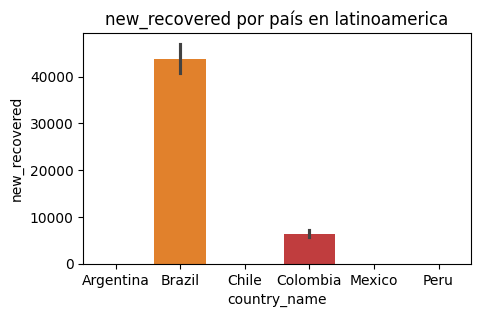

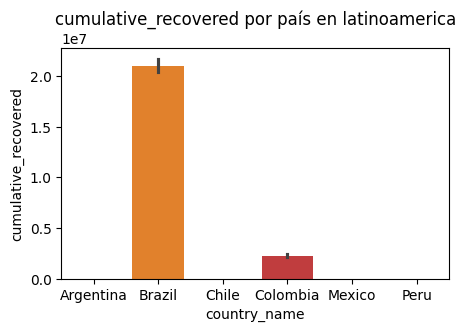

In [10]:
#Gráficos de barras de países contra el resto de variables

# diagrama de barra para cada pais con 6 columnas, 
for i in data.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                 'rea_sq_km', 'population_largest_city', 'area_rural_sq_km', 
                 'area_urban_sq_km']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(x='country_name', y=i, data=data, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()



In [11]:
# Se crea la matriz de correlación de las variables numéricas
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()

# Aquí se crea máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Vamos a mostrar valores superiores a 0.5 es decir donde hay una correlación fuerte
correlation_matrix = correlation_matrix[abs(correlation_matrix) > abs(0.5)]



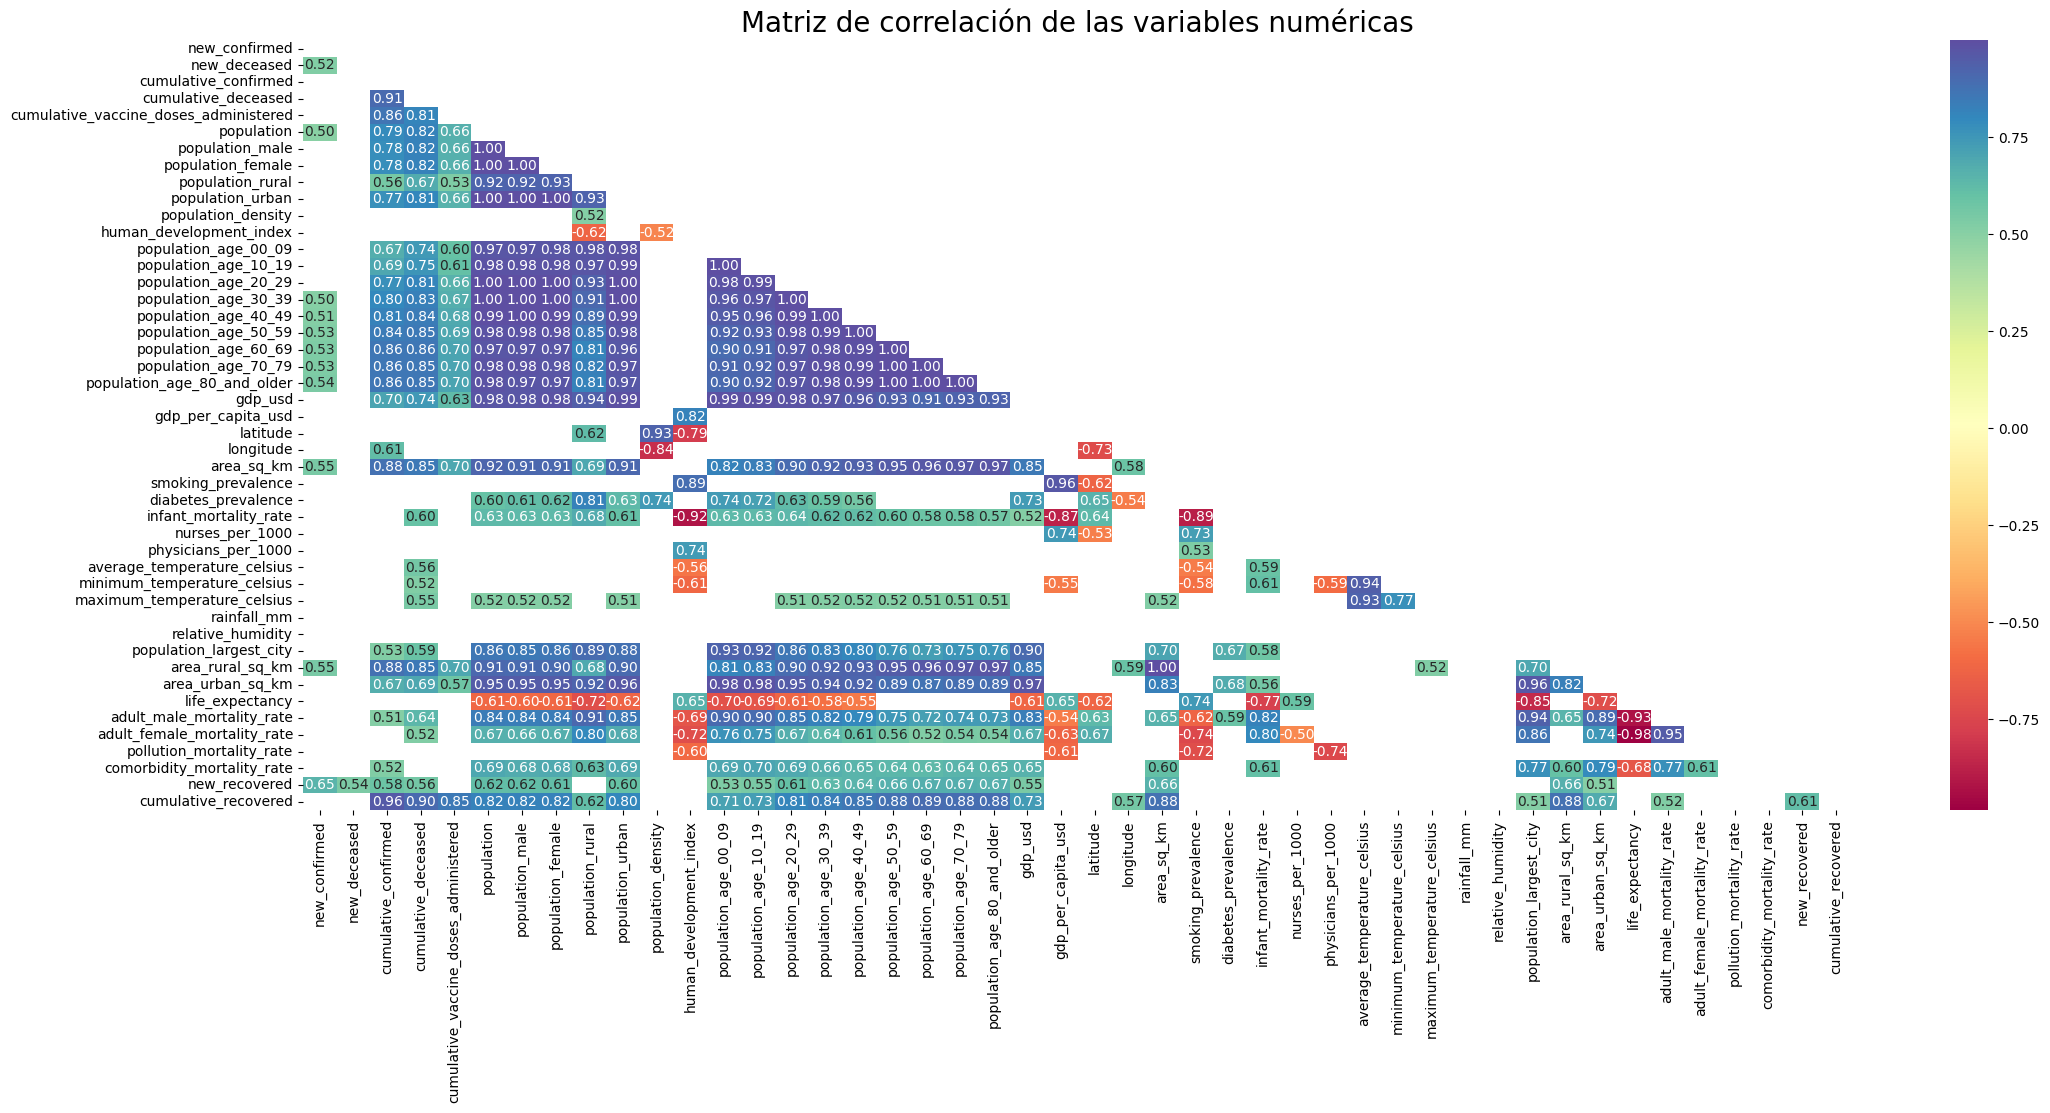

In [12]:
# Se crea la gráfica
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Matriz de correlación de las variables numéricas', fontsize=20)
plt.show()

El gráfico de correlación muestra que hay una fuerte correlación positiva entre diferentes grupos etarios de la población y el índice de desarrollo humano (HDI), así como entre la cantidad de médicos por cada 1000 habitantes y la expectativa de vida. Además, hay correlaciones negativas destacables entre la prevalencia de diabetes y las tasas de mortalidad infantil y de adultos, lo que sugiere una posible relación inversa entre estos factores de salud.

Histogramas de las variables que “Sí” tenga cambios de valores.

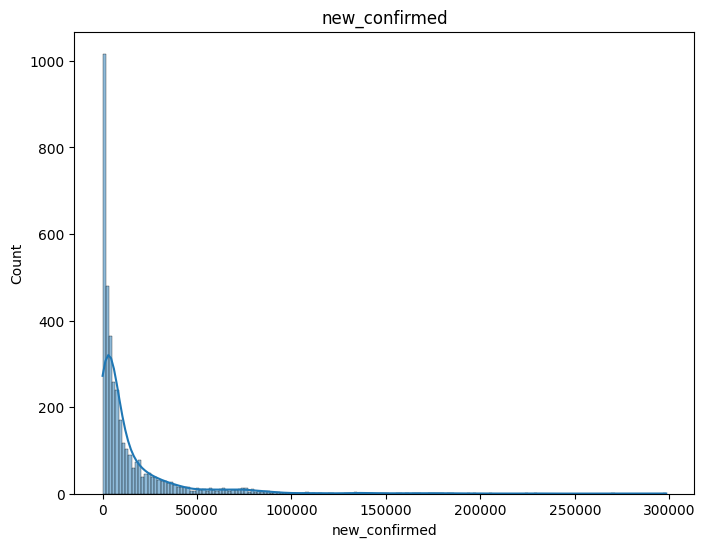

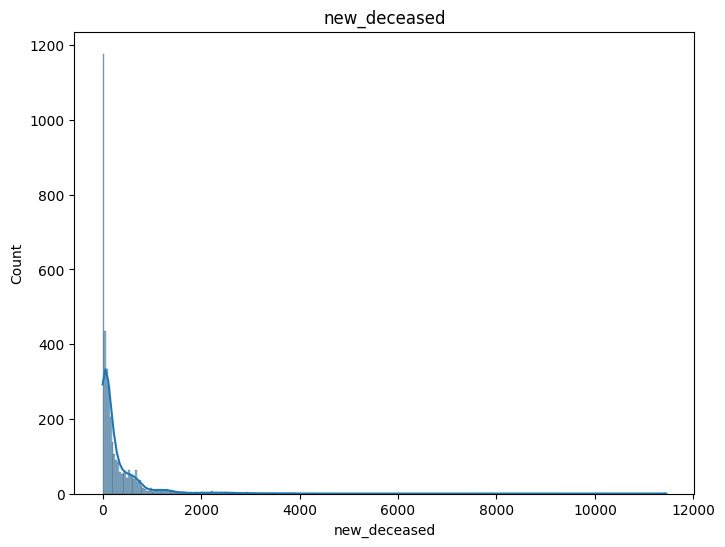

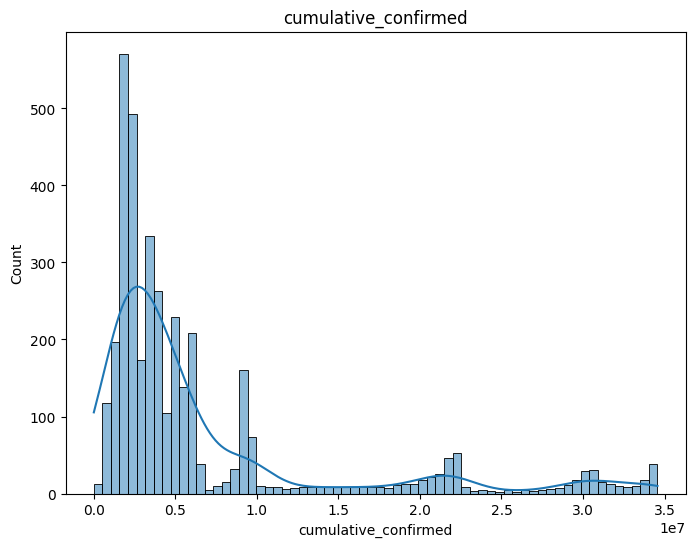

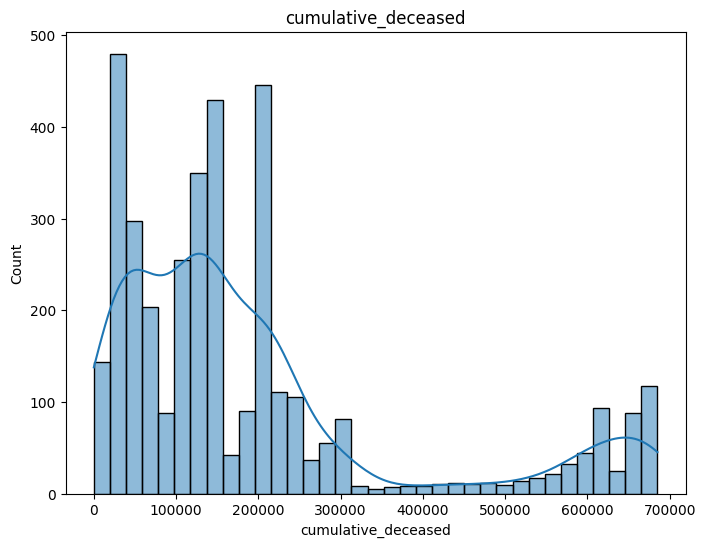

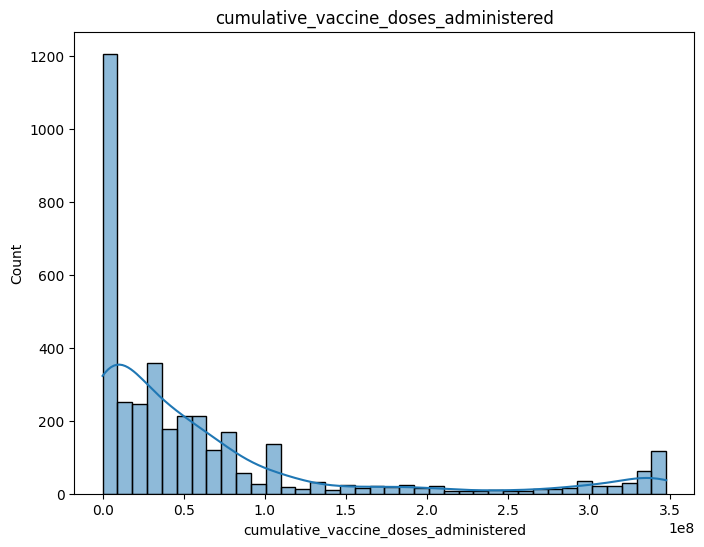

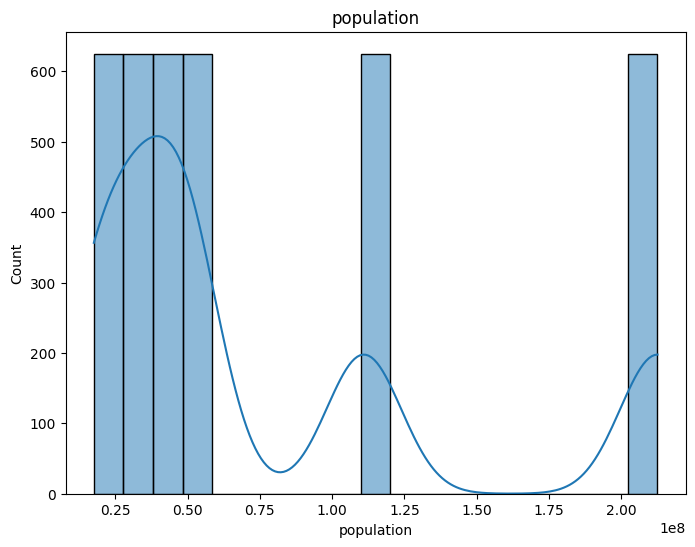

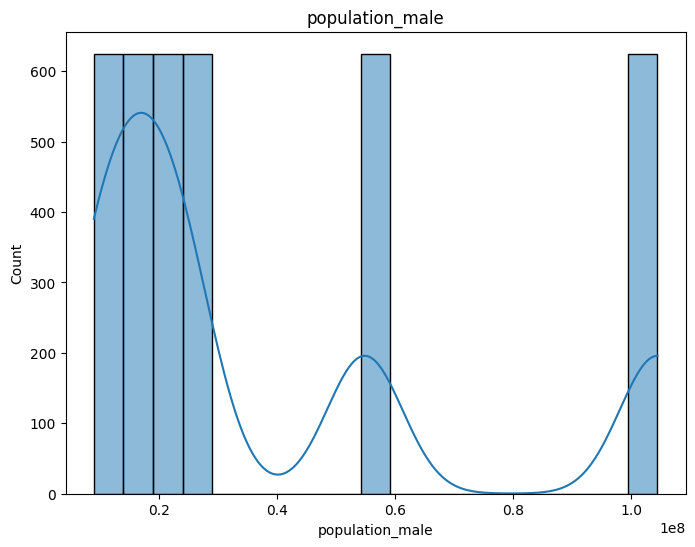

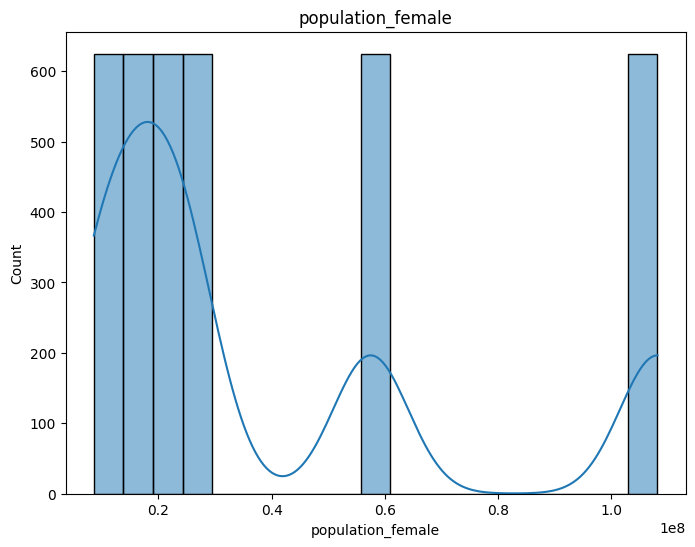

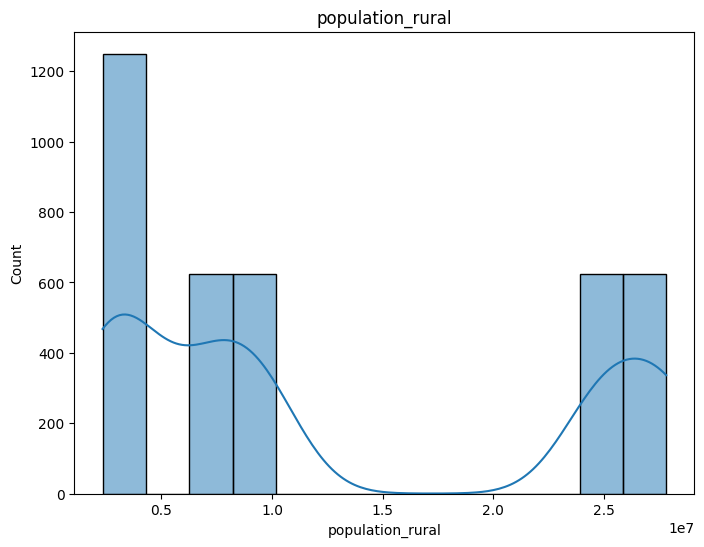

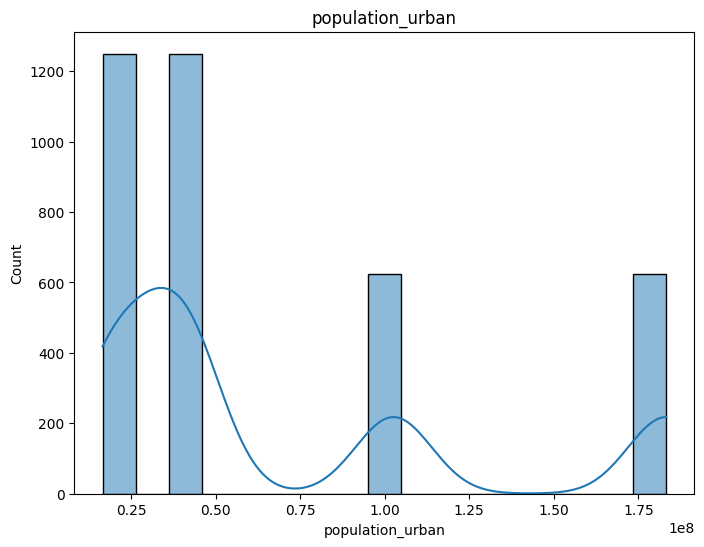

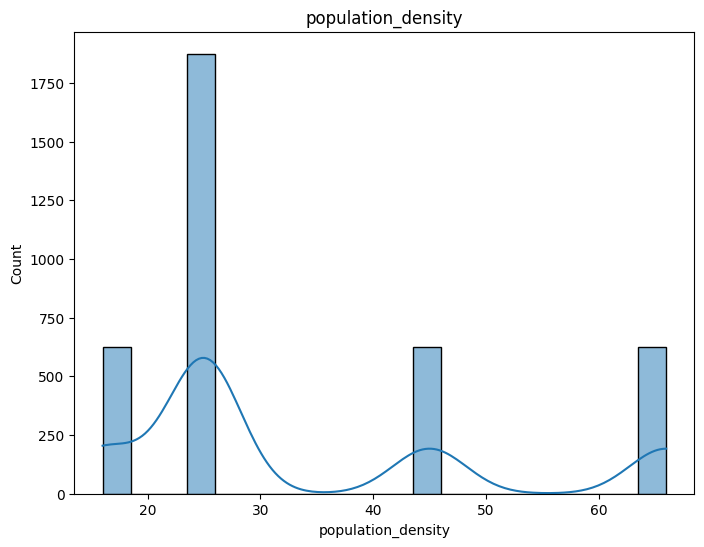

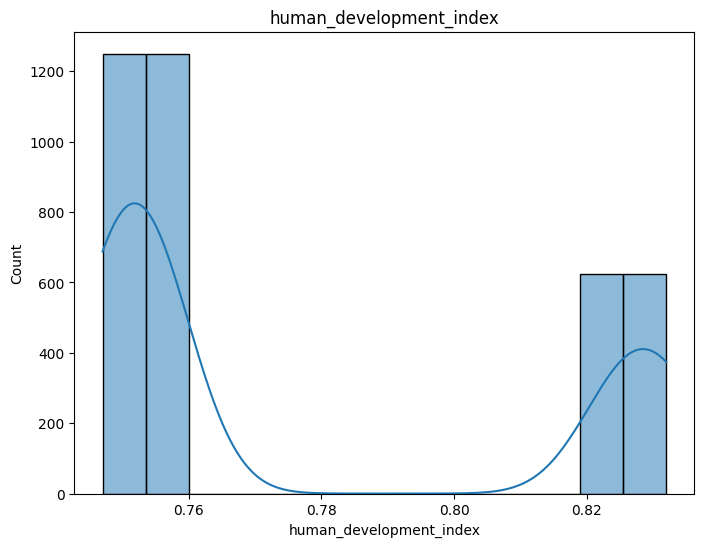

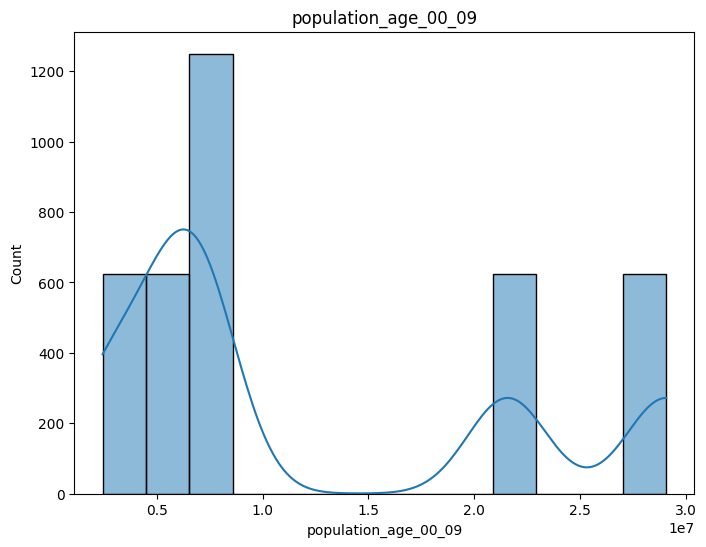

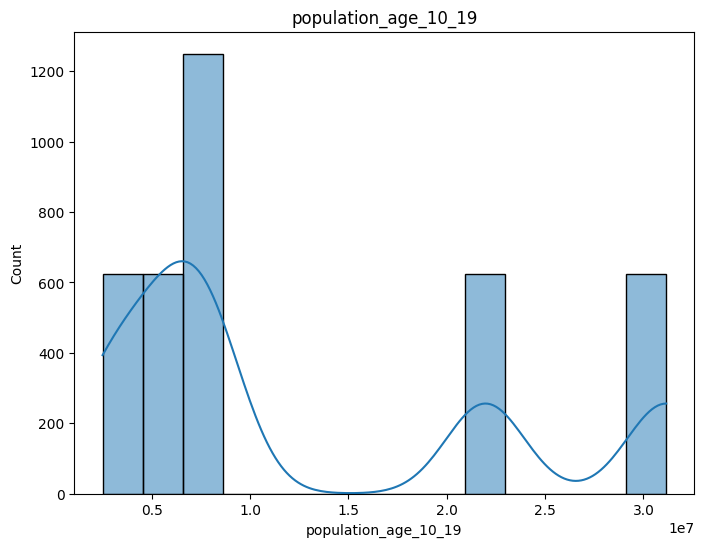

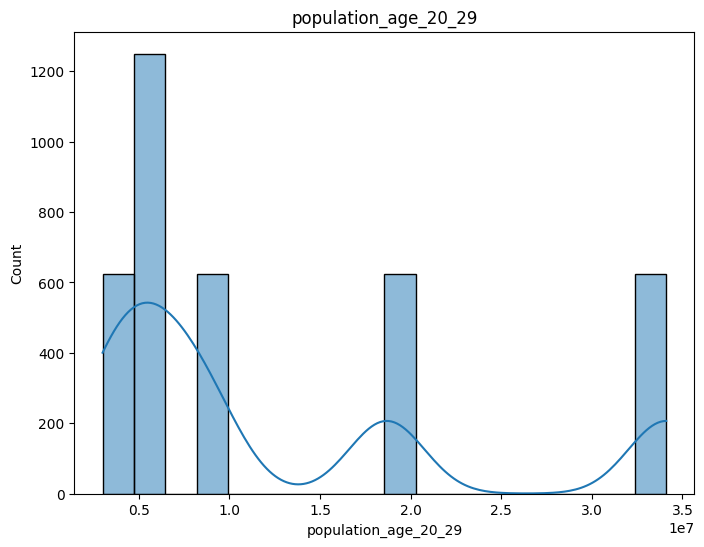

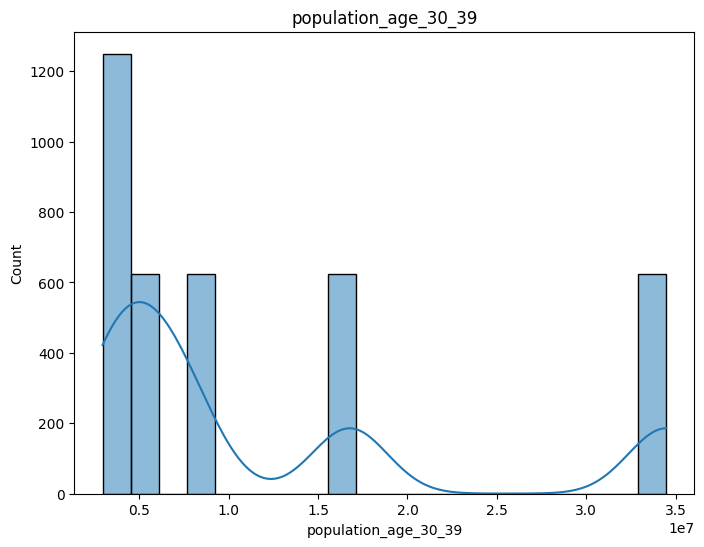

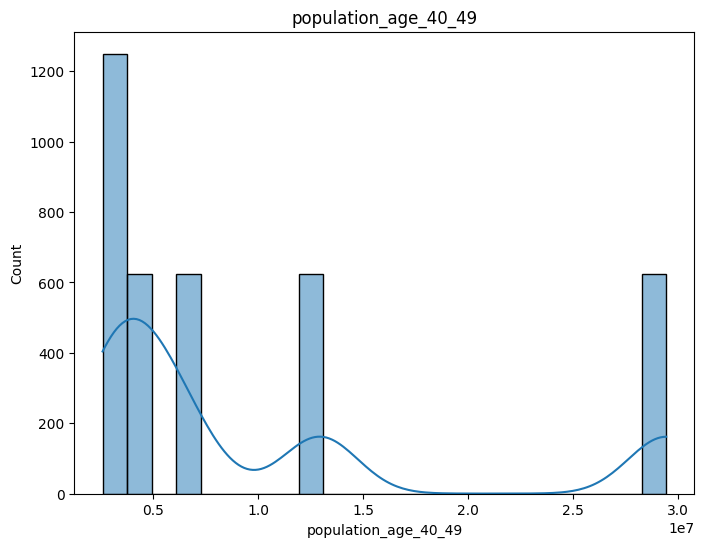

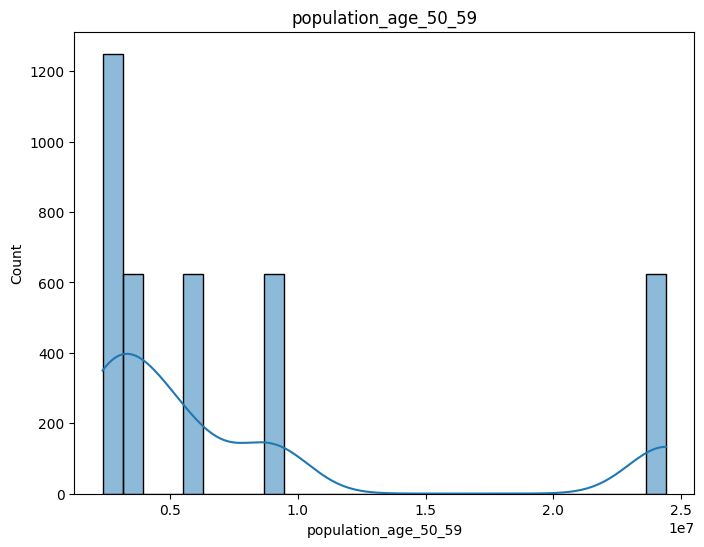

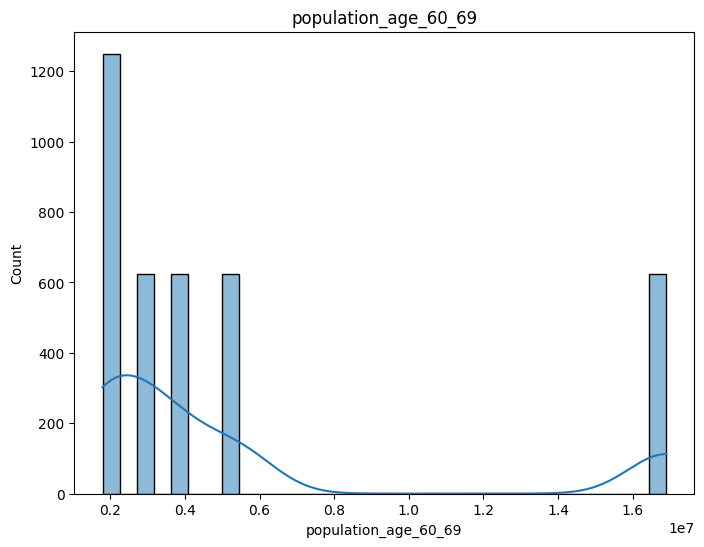

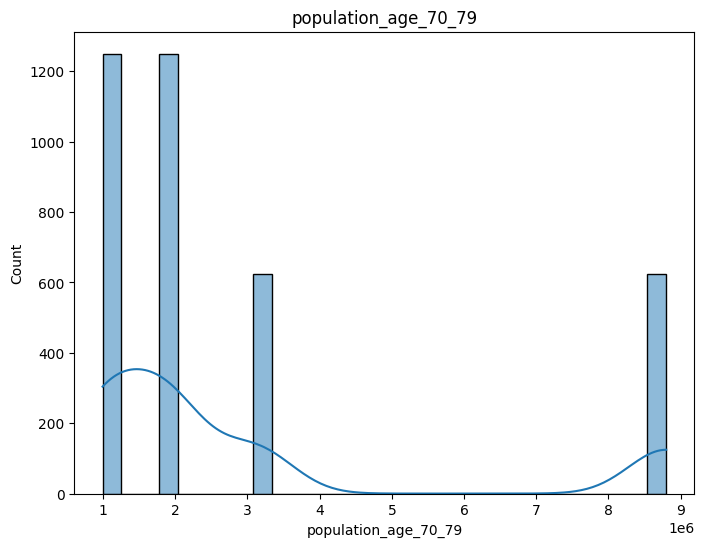

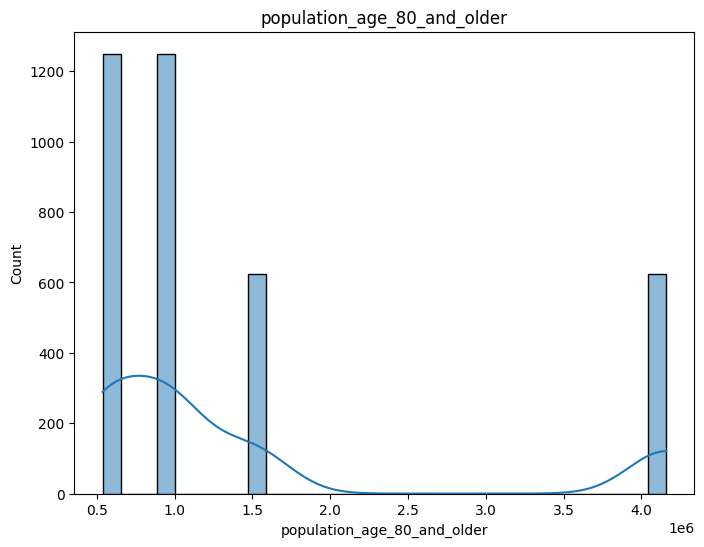

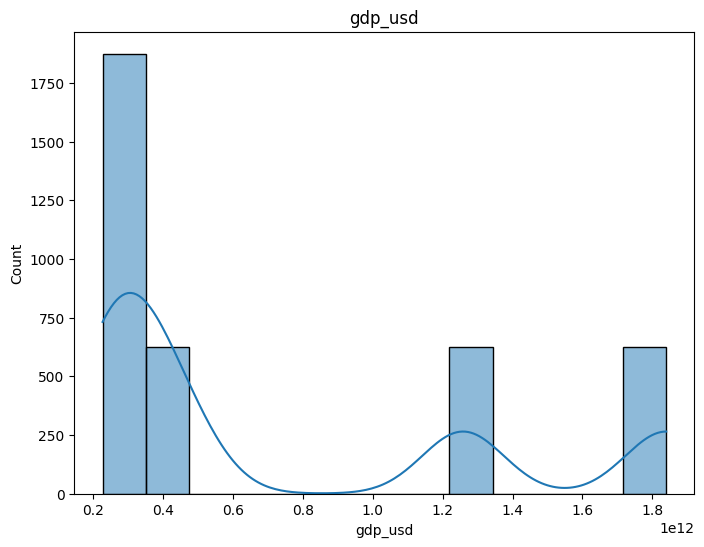

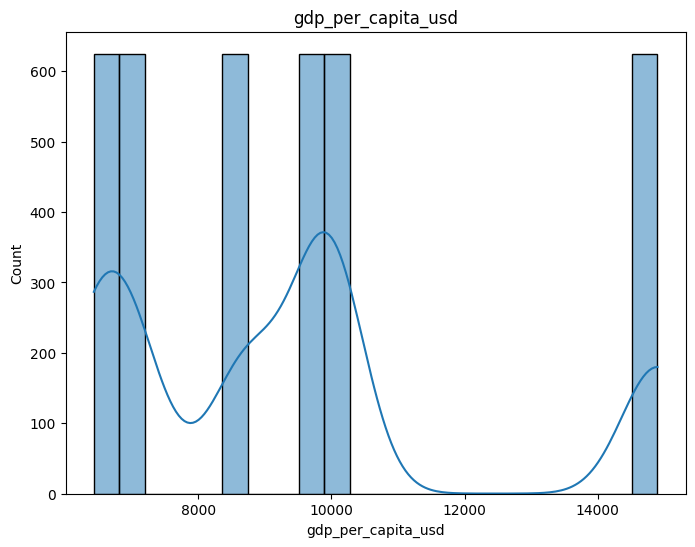

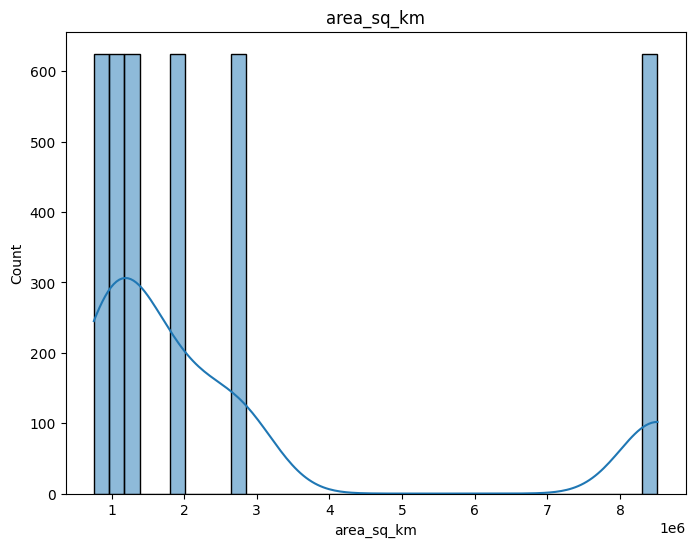

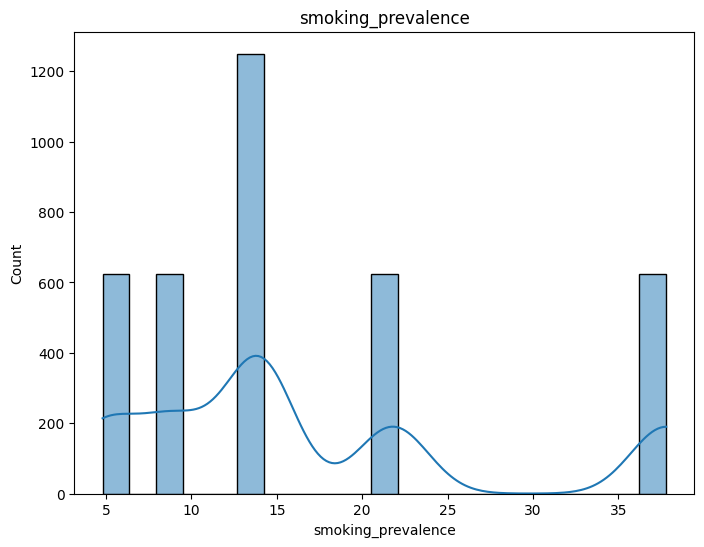

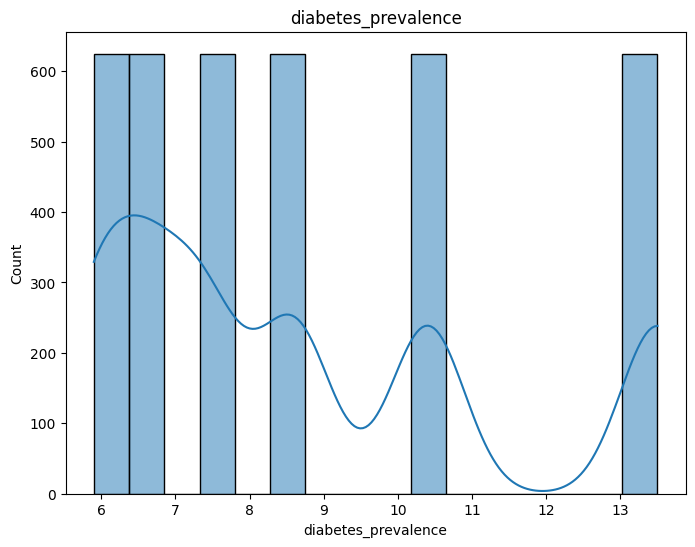

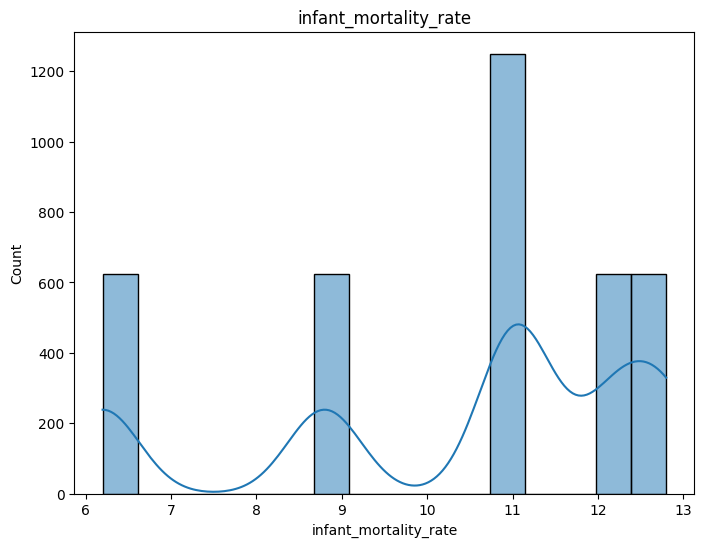

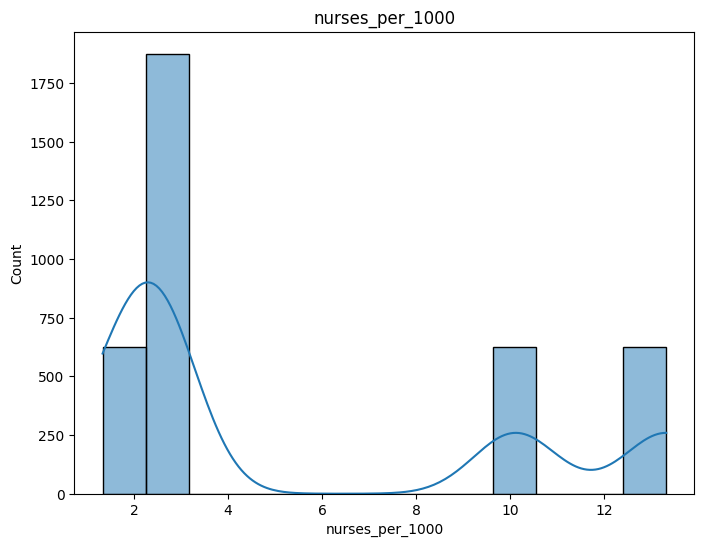

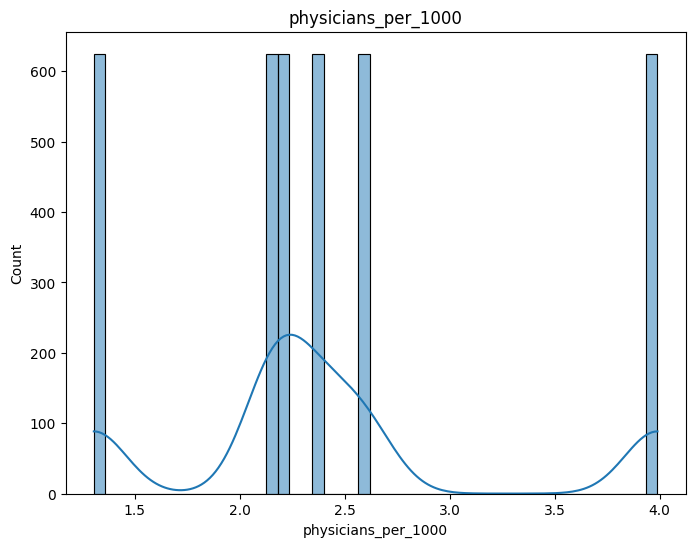

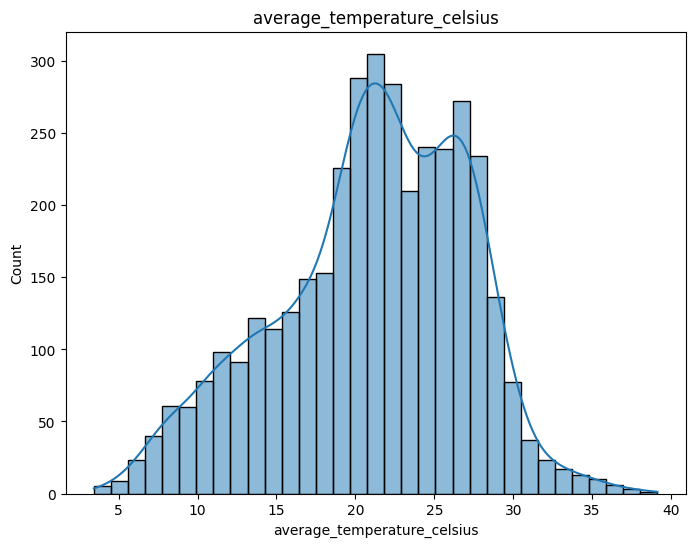

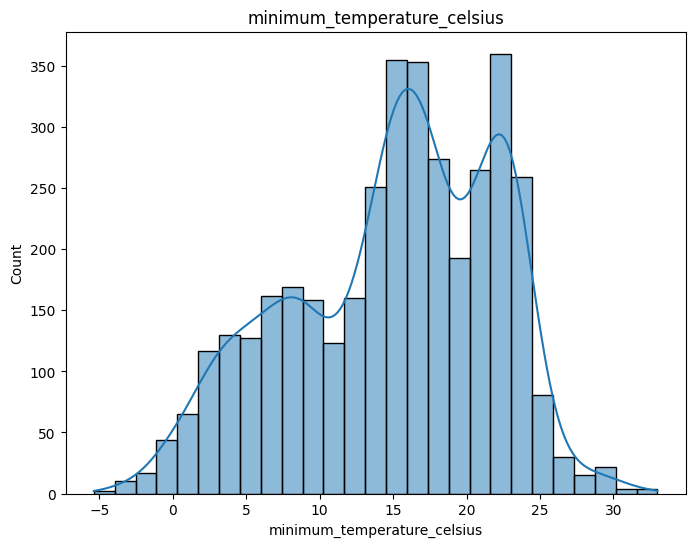

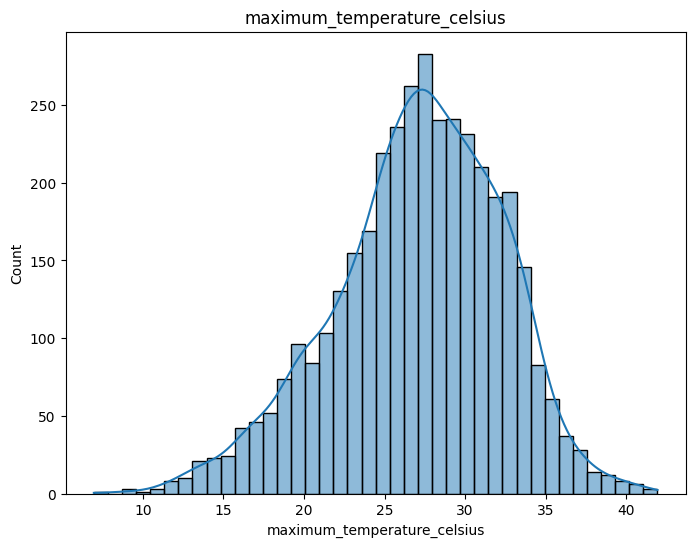

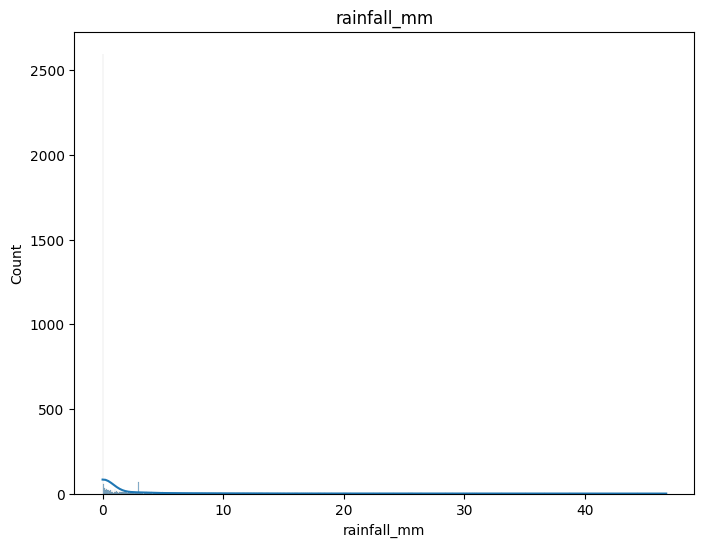

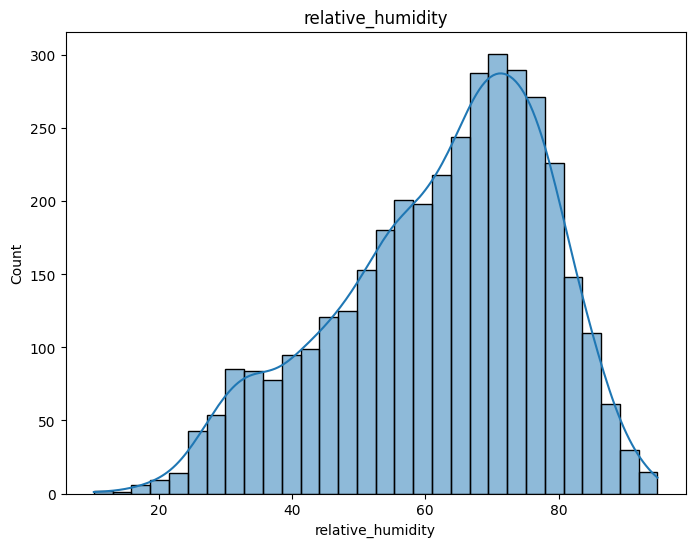

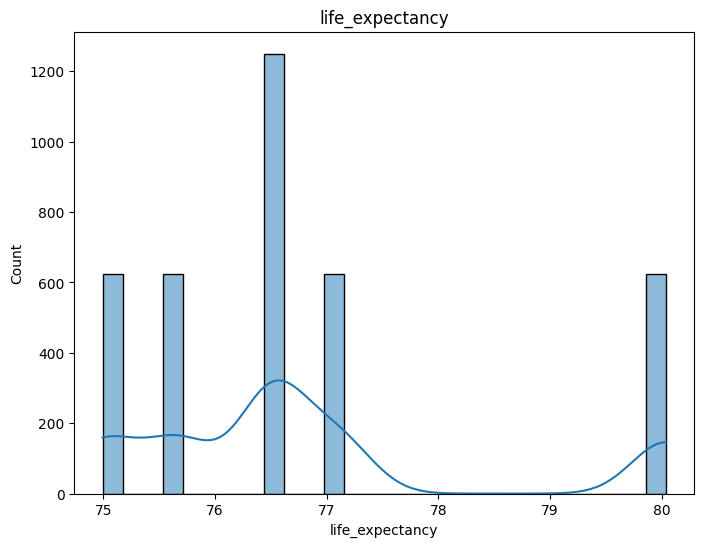

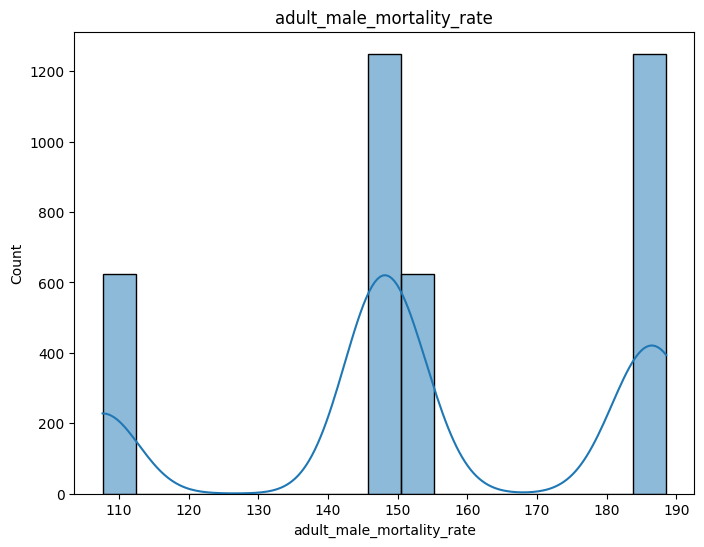

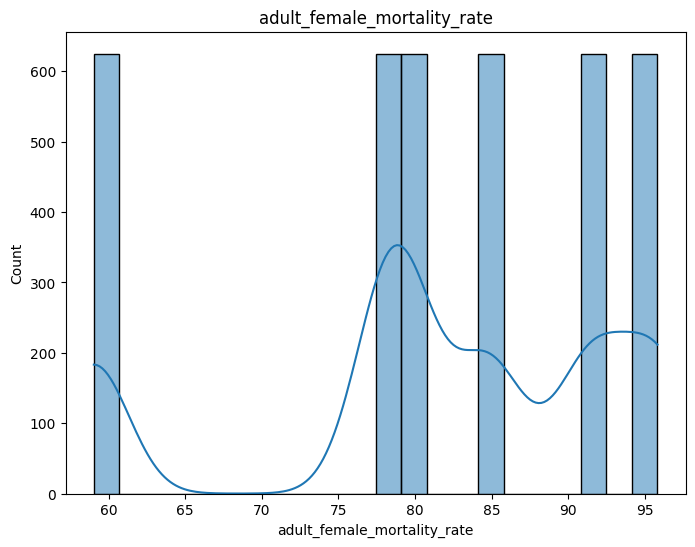

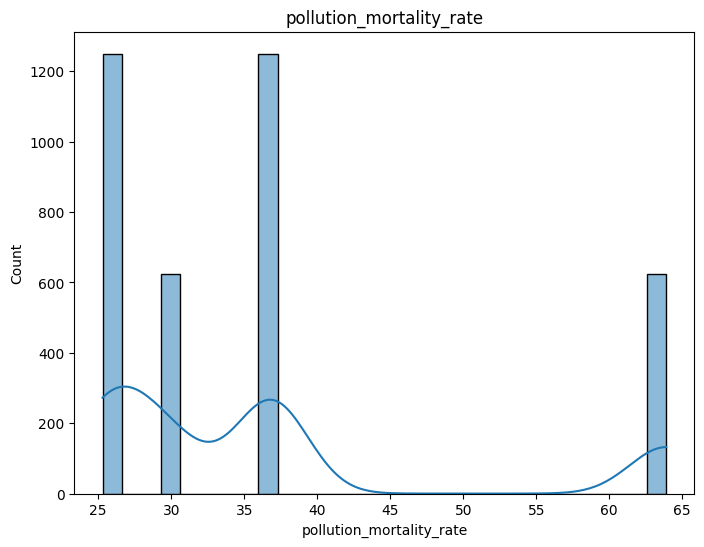

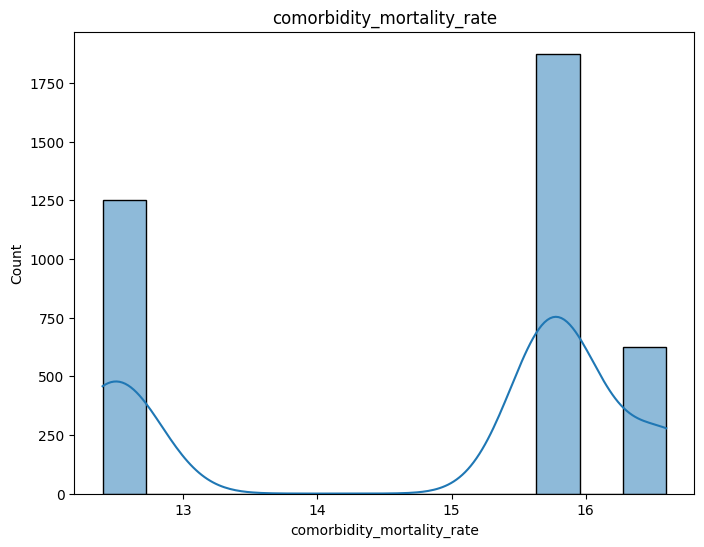

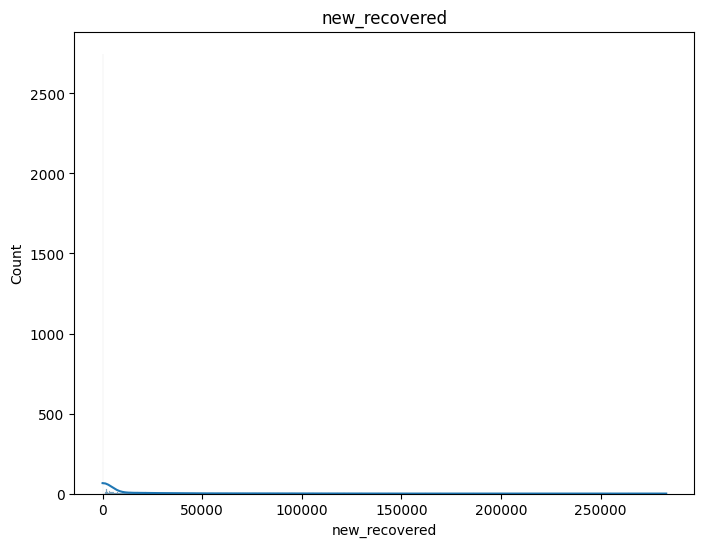

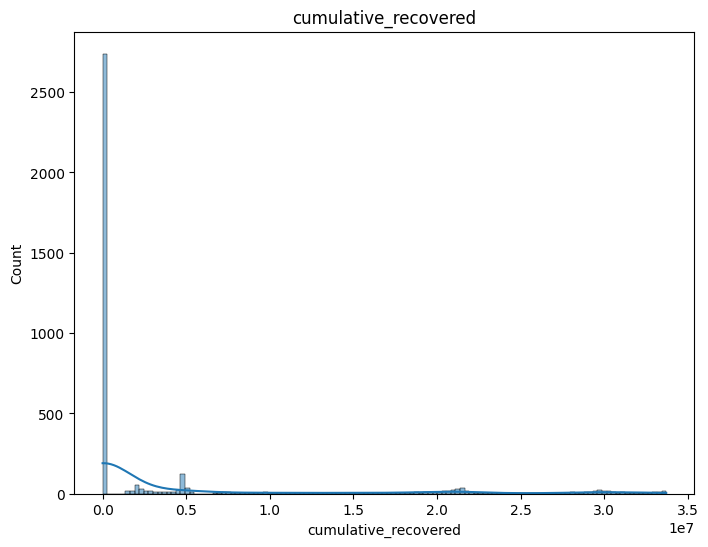

In [13]:
#Crea histograma de las variables numericas
for i in data.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 
                 'rea_sq_km', 'population_largest_city', 'area_rural_sq_km', 
                 'area_urban_sq_km']:
        fig, ax = plt.subplots(figsize=(8, 6))
        sns.histplot(data[i], kde=True)
        plt.title(i)
        plt.show()

Diagrama de dispersión de la temperatura media contra los casos confirmados.

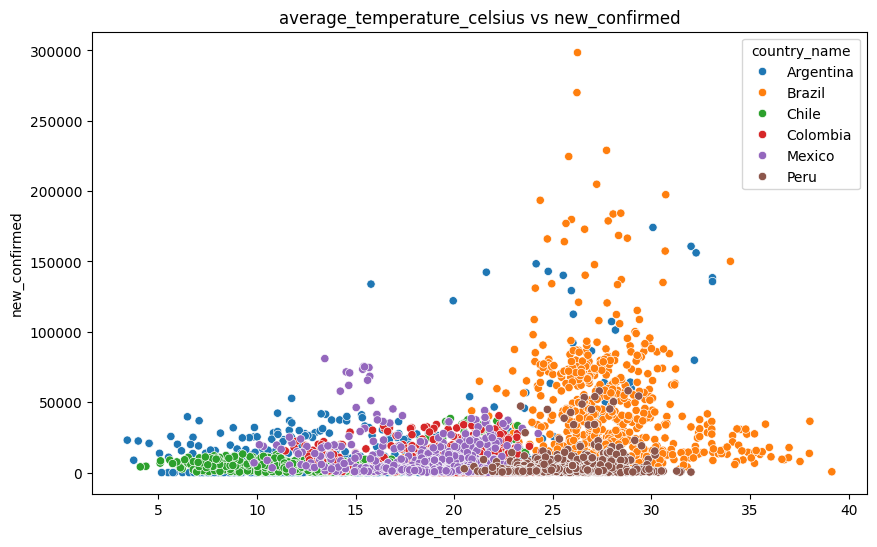

In [14]:
# Grafica de average_temperature_celsius vs new_confirmed

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_confirmed', data=data, hue='country_name')
plt.title('average_temperature_celsius vs new_confirmed')
plt.show()


El gráfico muestra una tendencia donde, en la mayoría de los países, los casos confirmados de COVID-19 tienden a aumentar en temperaturas más altas, especialmente en Brasil y México, que tienen la mayor concentración de casos nuevos en temperaturas entre 20°C y 30°C. Sin embargo, Argentina presenta un aumento notable de casos incluso en temperaturas más bajas (alrededor de 10°C).

Diagrama de dispersión de la temperatura media contra las muertes confirmadas

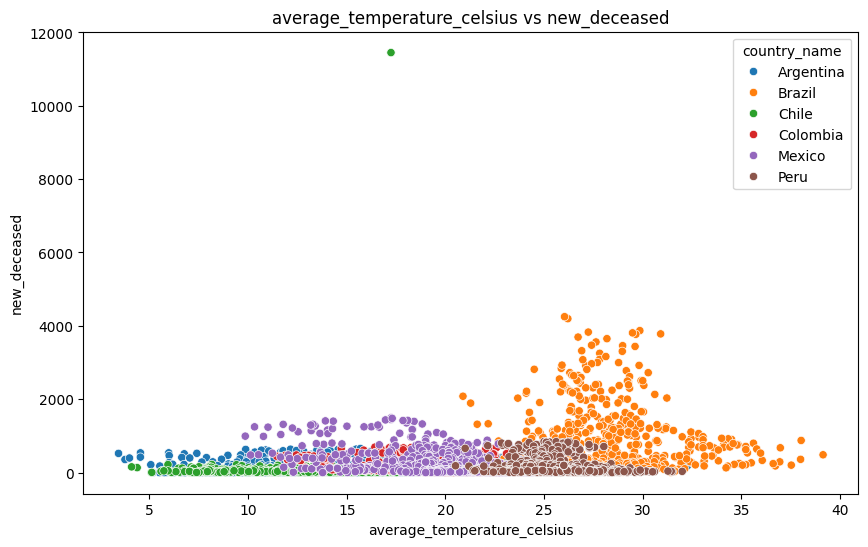

In [15]:
# Grafica de average_temperature_celsius vs new_deceased

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='average_temperature_celsius', y='new_deceased', data=data, hue='country_name')
plt.title('average_temperature_celsius vs new_deceased')
plt.show()

En el gráfico se observa que las muertes nuevas por COVID-19 tienden a aumentar con temperaturas más altas, especialmente en Brasil y México, que muestran una mayor concentración de decesos en temperaturas entre 25°C y 30°C. Sin embargo, Chile tiene un caso atípico con un número muy alto de fallecimientos en temperaturas más bajas, alrededor de 15°C, sim embargo falta un analisis mas profundo en cuanto al tipo de cada pais y la estaciones para la fecha de los decesos

Comportamiento de las dosis administradas de todos los países (Valor medio).

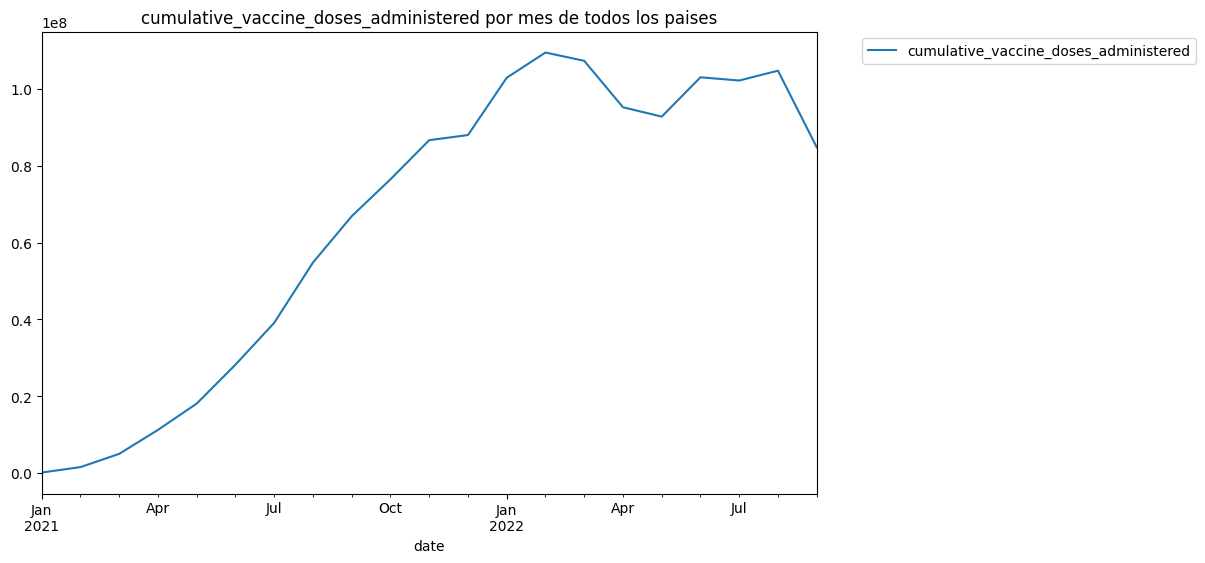

In [16]:
# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered

fig, ax = plt.subplots(figsize=(10, 6))
data.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('cumulative_vaccine_doses_administered por mes de todos los paises')
plt.show()

Se observa un aumento constante en el número de dosis administradas desde principios de 2021 hasta mediados de 2022, con una ligera desaceleración hacia finales de ese período.

Evolución de dosis administradas por mes de cada país.

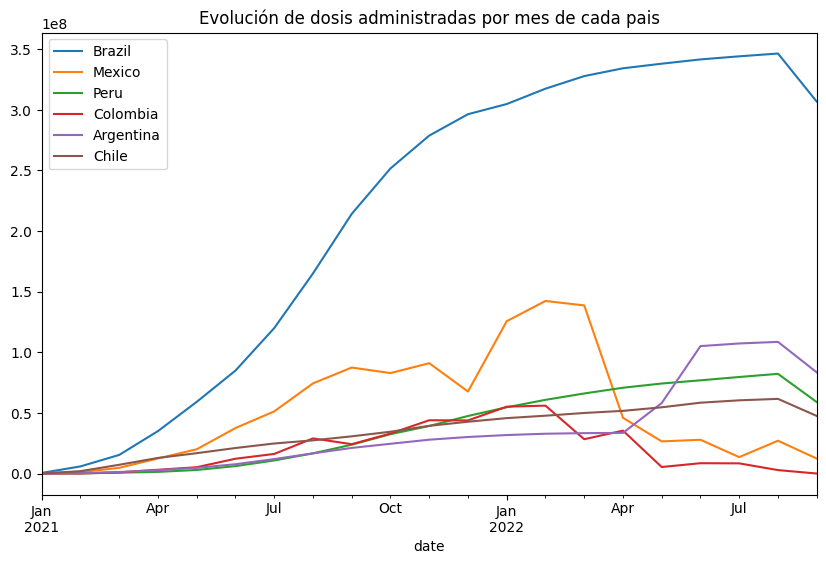

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data[data['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

plt.title('Evolución de dosis administradas por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

En general, se observa una tendencia al alza en el número de dosis administradas en todos los países a lo largo del período analizado. Esto indica un esfuerzo continuo por vacunar a la población.

Muertes por mes de cada país.

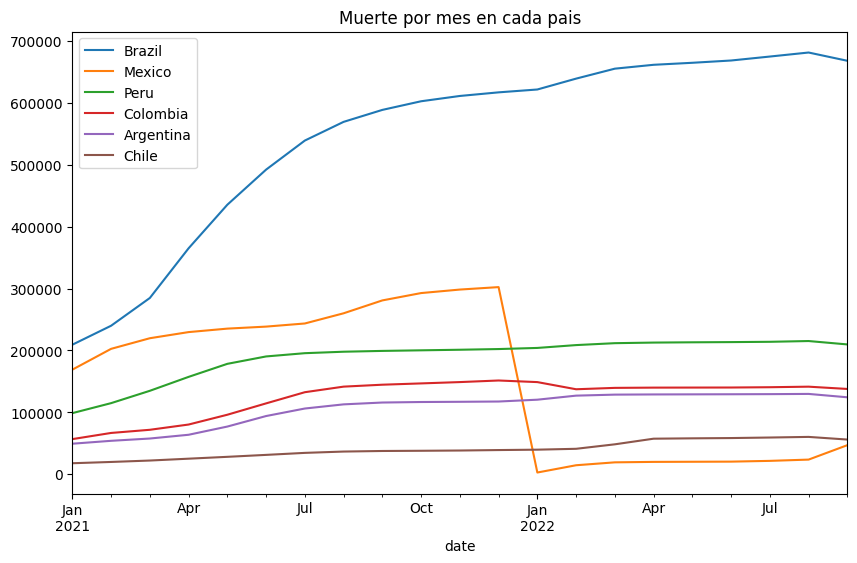

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data[data['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()

plt.title('Muerte por mes en cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Los países muestran ritmos de mortalidad distintos. Brasil y México presentan las curvas de mortalidad más pronunciadas, lo que sugiere que estos países han sido los más afectados por la pandemia en términos de número de fallecidos. Hacia finales del período analizado (mediados de 2022), se observa una tendencia a la desaceleración en el ritmo de aumento de las muertes en la mayoría de los países. Esto podría indicar una disminución en la tasa de mortalidad, lo cual podría estar relacionado con factores como la vacunación, la implementación de medidas de control más efectivas o cambios en la virulencia del virus.

Casos confirmados por mes de cada país.

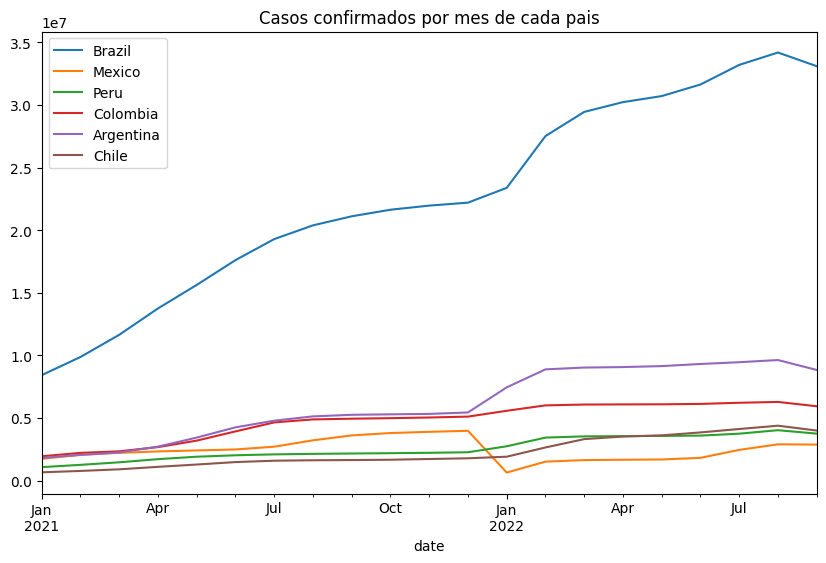

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data[data['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()

plt.title('Casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

nuevamente Brasil esta en el top de los datos analizados pero luego en un enfoque mas detallado, se comparará los casos
confirmados con la densidad poblacional

Recuperaciones de casos por mes de cada país

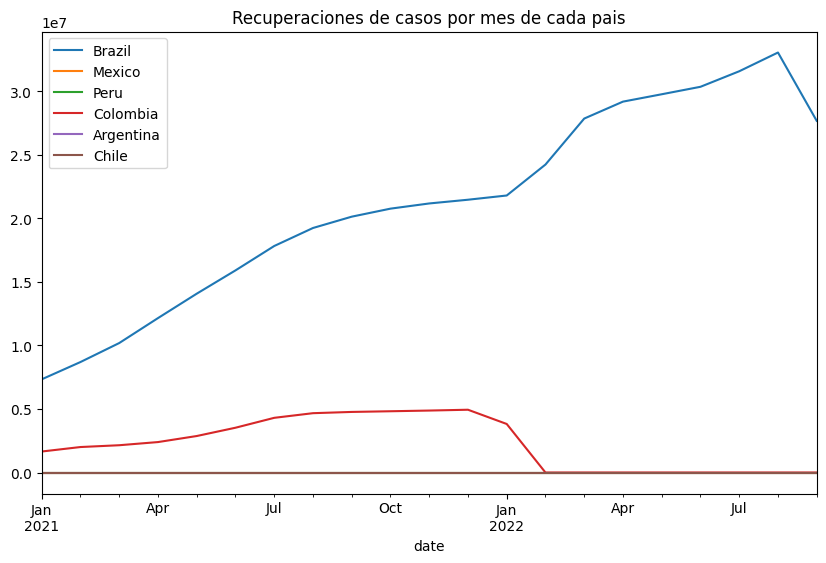

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data[data['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()

plt.title('Recuperaciones de casos por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Podemos apreciar que para Brazil tenemos los datos completos, para Colombia tenemos datos hasta el Febrero del 2022 y el resto de fechas eran valores nulos y se decidieron reemplazar por ceros. Lo mmismo ocurrio para Peru, Mexico,Argentina  y Chile, en su gran mayoria no tenia datos y se remplazapmn por 0

Comparación del Número de Casos Nuevos entre Países.

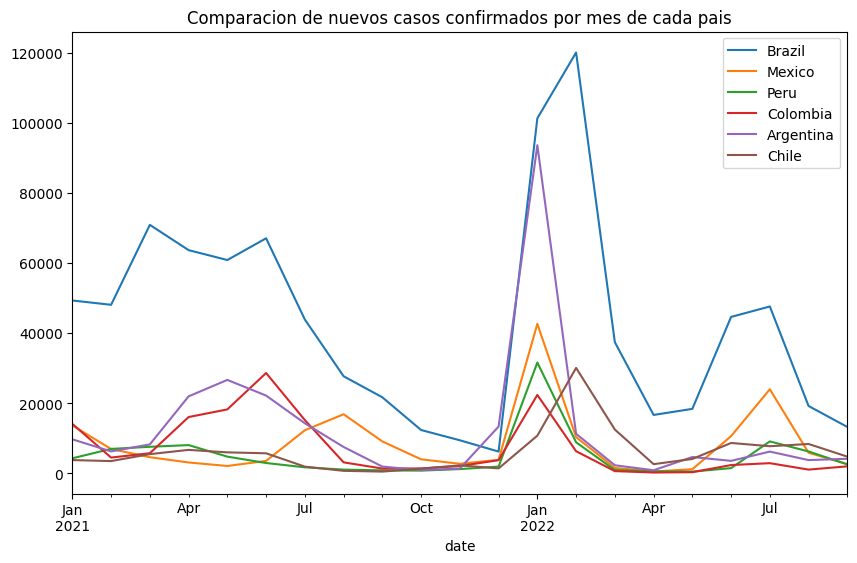

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

for pais in paises_seleccionados:
    data[data['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()

plt.title('Comparacion de nuevos casos confirmados por mes de cada pais')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

Se puede apreciar un patron en los datos de los paises en los meses de Diciembre, Enero y Febrero siendo el pico en Enero, esto puedeser debido 
a la temporada navideña y el no acatamiento al distanciamiento social, otro patron elevado pero en menor medida en los meses de junio y Julio.

Dosis acumuladas por país

Text(0.5, 1.0, 'Distribución de dosis acumuladas por país')

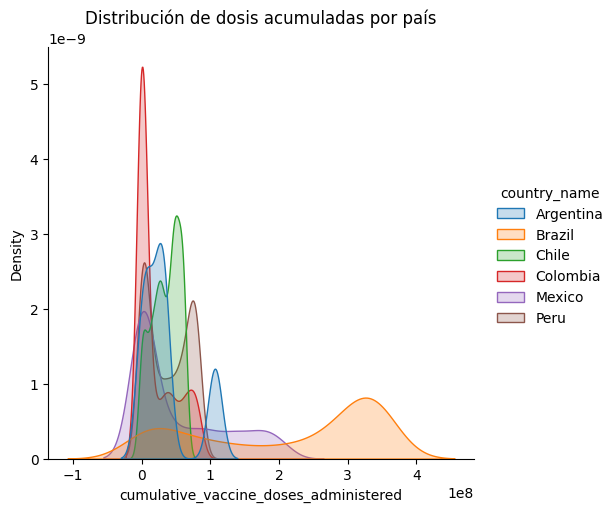

In [22]:
sns.displot(data, x="cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill=True)
plt.title('Distribución de dosis acumuladas por país')

De los países que peor manejaron la pandemia fue Brasil, seguido de México, Colombia, Argentina, Perú y Chile, se puede observar que la cantidad de muertes y casos confirmados es mayor en estos países además de ser desproporcionada la cantidad de vacunas administradas

Boxplot de temperatura media de cada país.

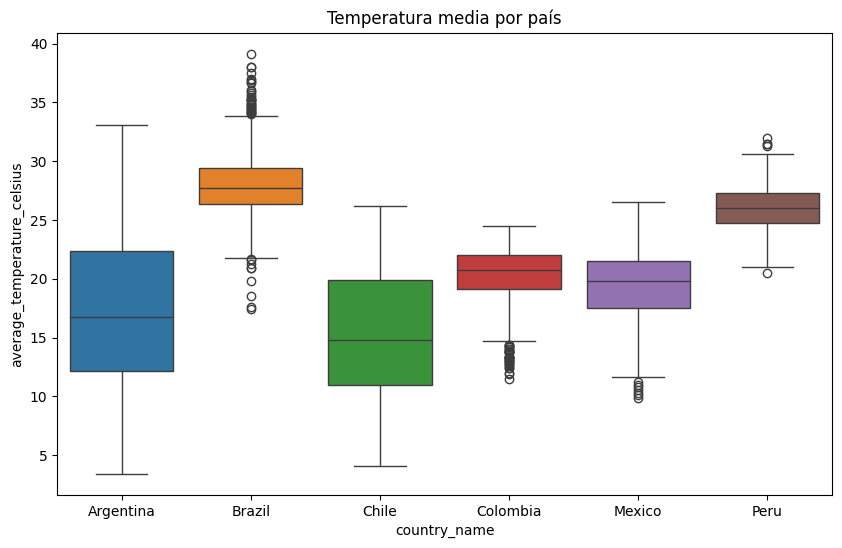

In [23]:
# average_temperature_celsius vs new_confirmed por pais boxplot
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(x='country_name', y='average_temperature_celsius', data=data, hue='country_name')
plt.title('Temperatura media por país')

plt.show()

el texto plantea que, aunque Chile parece ser un caso de éxito en el manejo de la pandemia, se necesitan análisis más exhaustivos para tomar decisiones informadas sobre la asignación de recursos y estrategias de control de la enfermedad. Los datos sugieren que las zonas con mayor número de casos y muertes deberían ser priorizadas, pero se requieren estudios más detallados para confirmar esta hipótesis.

Violinplot de las variables que “Sí” tenga cambios de valores.

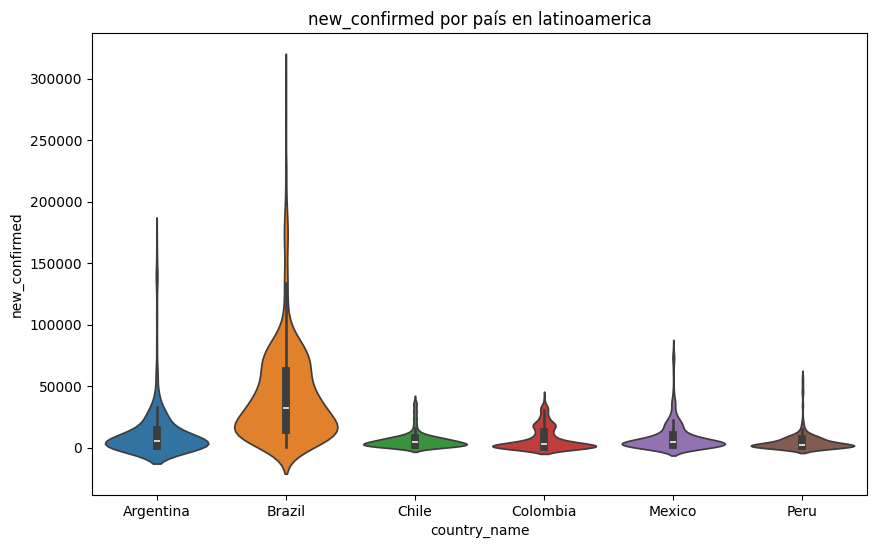

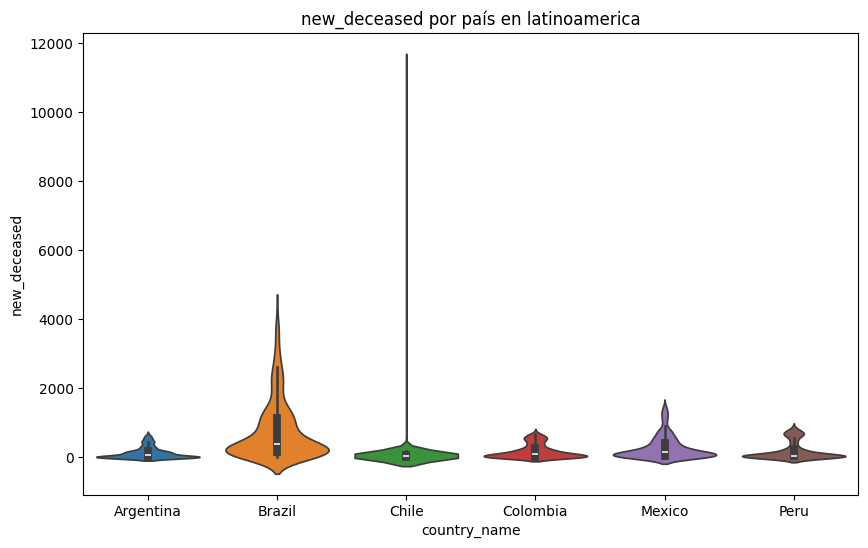

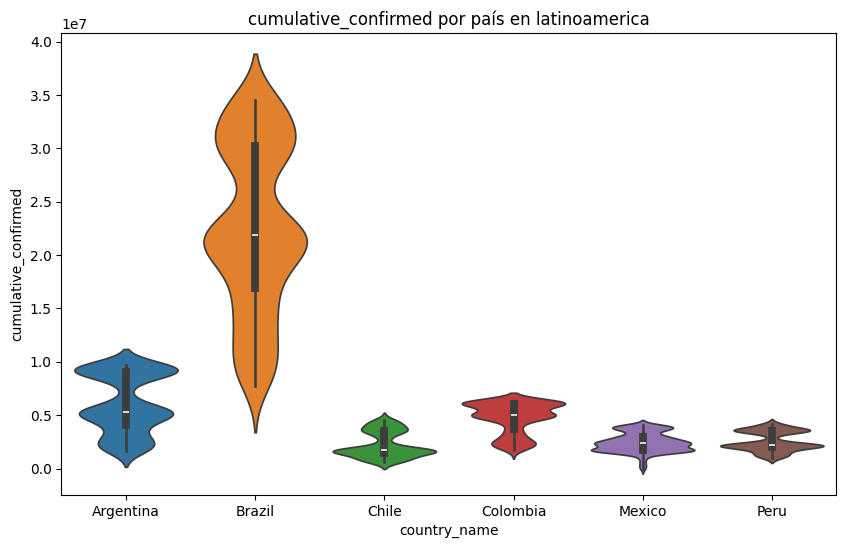

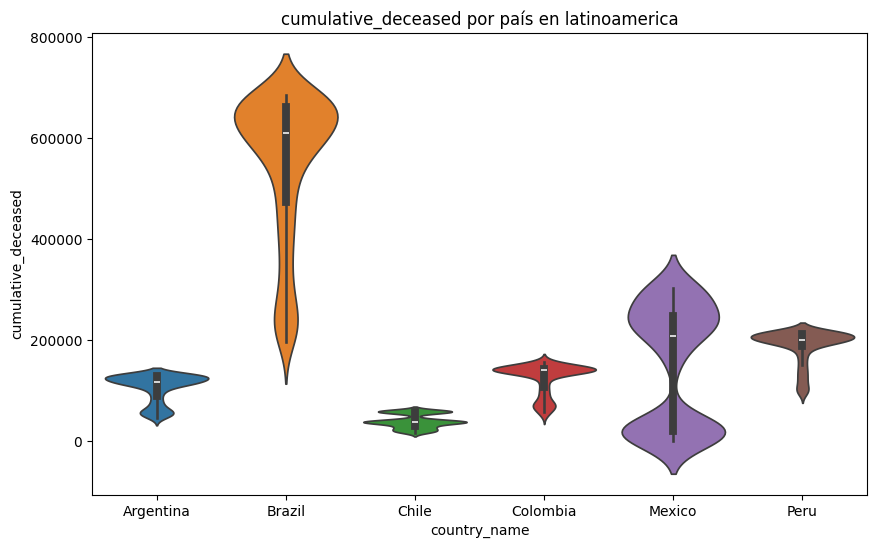

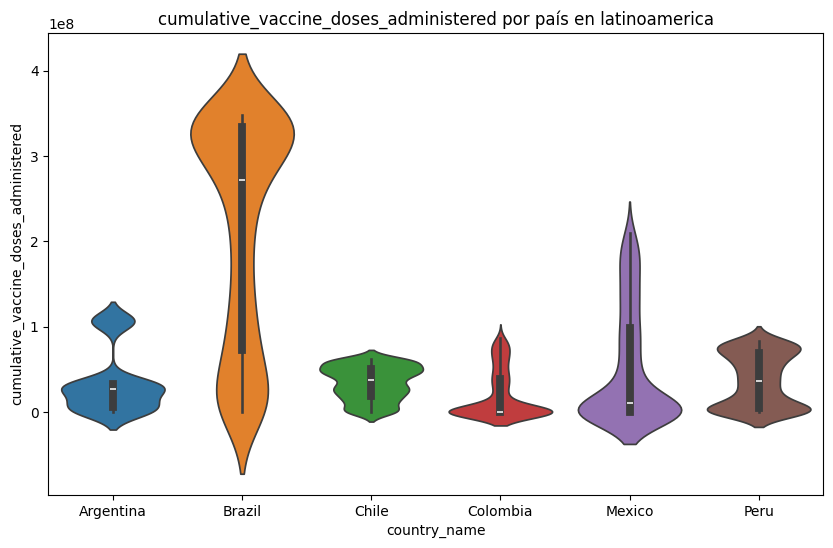

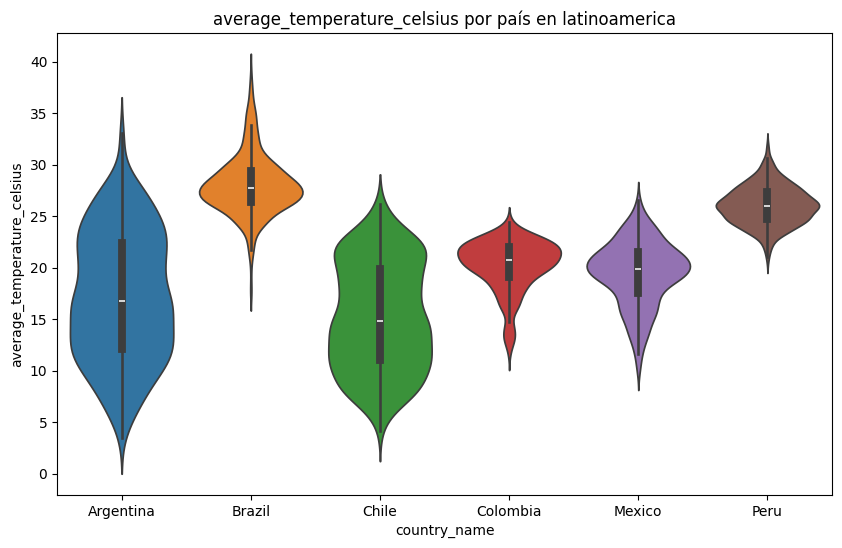

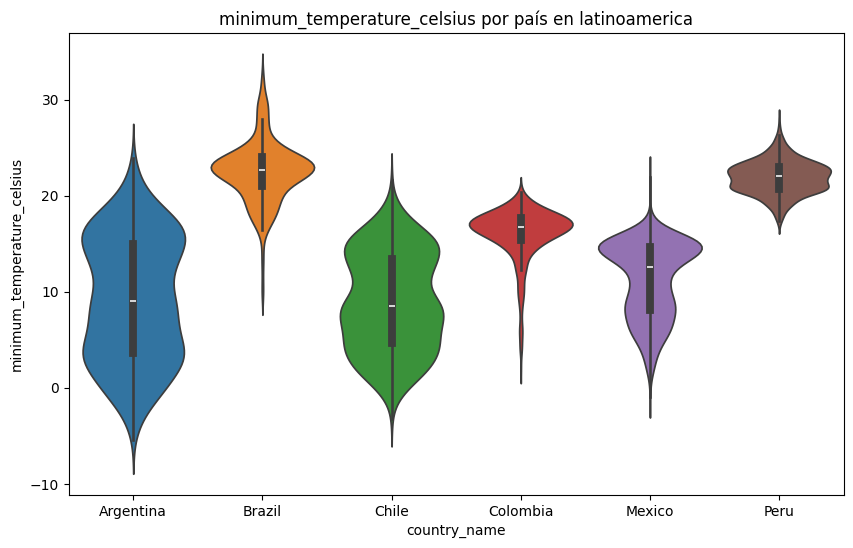

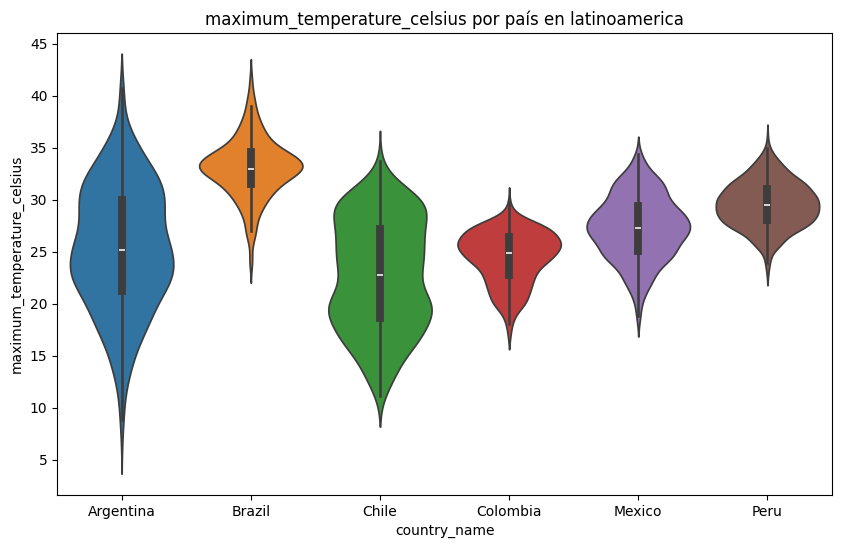

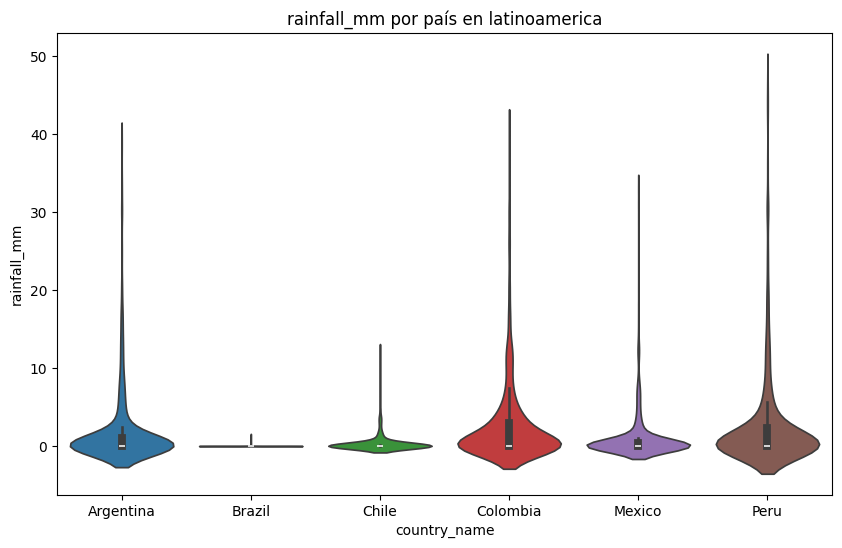

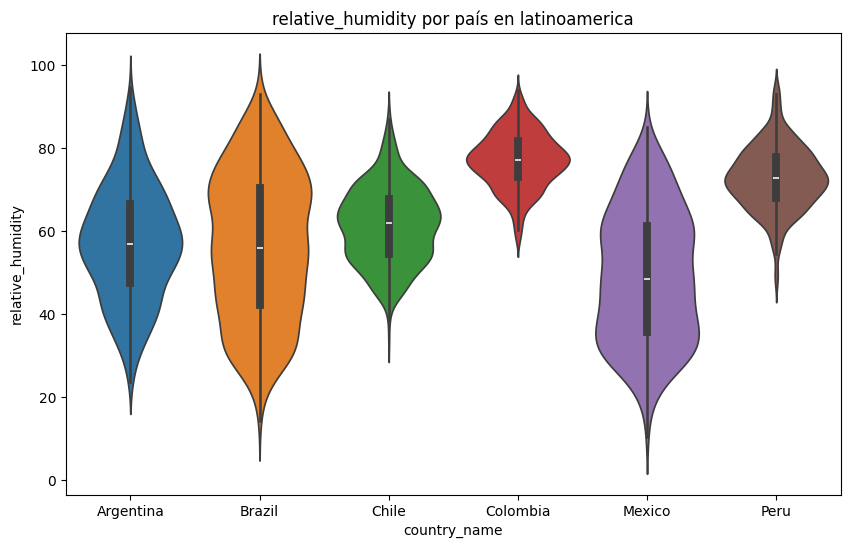

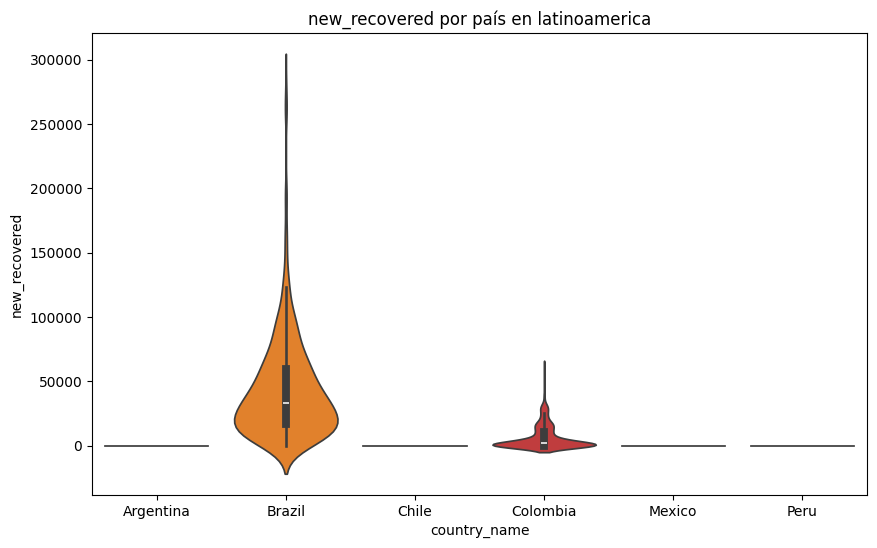

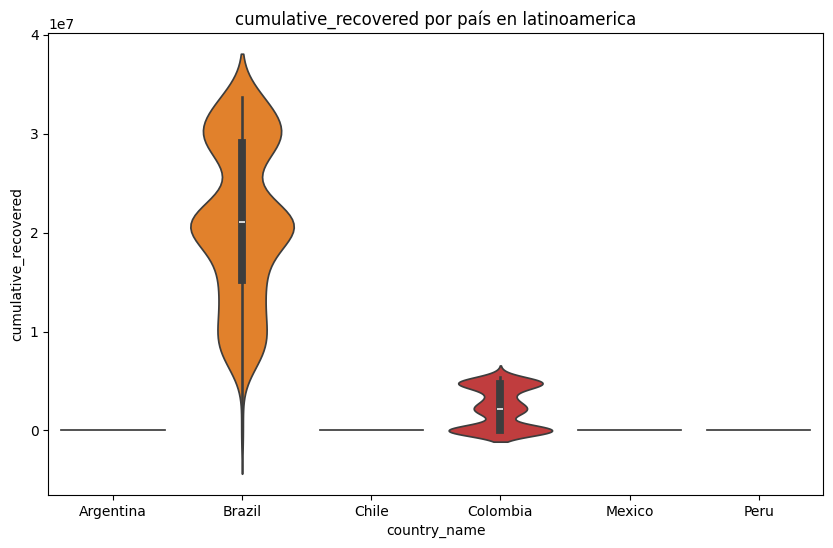

In [24]:
# Se crea un dataframe con las columnas mayores a 6 porque son las que tienen valores diferentes para cada país.
columnas_mayores_6 = []

for i in data.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude']:
        if data[i].nunique() > 6:
            columnas_mayores_6.append(i)

# agregar a columnas_mayores_6 la columna country_name para poder hacer análisis por país.
columnas_mayores_6.append('country_name')

# Se crea un dataframe con las columnas mayores a 6
data_mayores_6 = data[columnas_mayores_6]

# violinplot en todos los países para variables numéricas
for i in data_mayores_6.columns:
    if i not in ['location_key', 'date', 'country_code', 'latitude', 'longitude', 'country_name']:
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.violinplot(x='country_name', y=i, data=data_mayores_6, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.show()

l gráfico de violín es una excelente herramienta visual para comparar la distribución de un conjunto de datos numéricos entre diferentes categorías. En el caso de este caso, nos muestra la distribución del número total de casos confirmados de COVID-19 (eje y) para cada país de Latinoamérica (eje x).

Cada violín representa un país y su forma nos indica cómo se distribuyen los datos dentro de ese país. La parte más ancha del violín indica donde se concentra la mayor cantidad de datos, mientras que las partes más estrechas indican donde hay menos datos. La línea negra dentro del violín representa el rango intercuartílico (IQR), que abarca el 50% central de los datos, y el punto negro dentro del IQR representa la mediana.

Distribución de la población por grupos de edad.

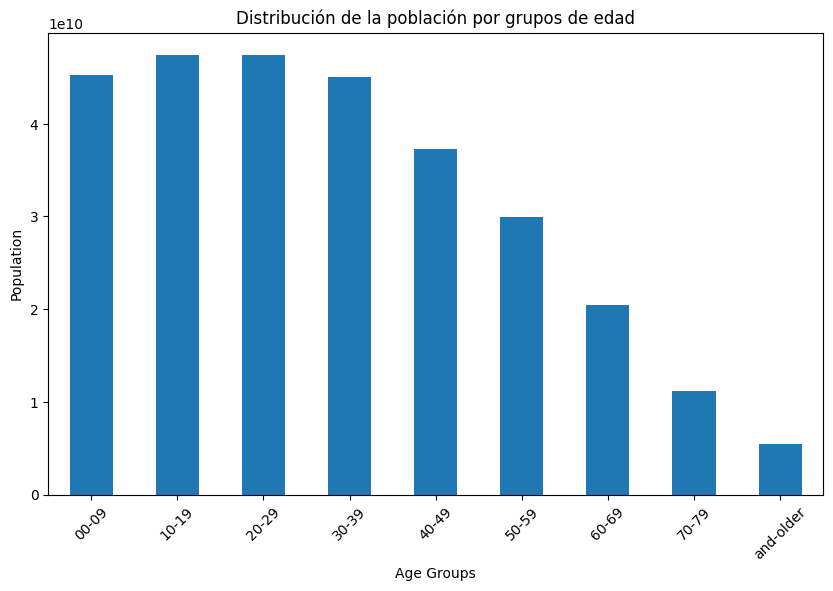

In [25]:
# Calculamos la distribución de la población por grupos de edad
age_columns = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
age_distribution = data[age_columns].sum()

plt.figure(figsize=(10, 6))
age_distribution.plot(kind='bar', stacked=True)

plt.xlabel('Age Groups')
plt.ylabel('Population')

plt.title('Distribución de la población por grupos de edad')
plt.xticks(range(len(age_columns)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

Esta gráfica es interesante porque nos permite ver la población por grupos de edad en cada país, lo que nos puede ayudar a entender cómo se comporta la población y también nos genera la idea de que podríamos graficar la cantidad de vacunas por cada grupo etario

Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

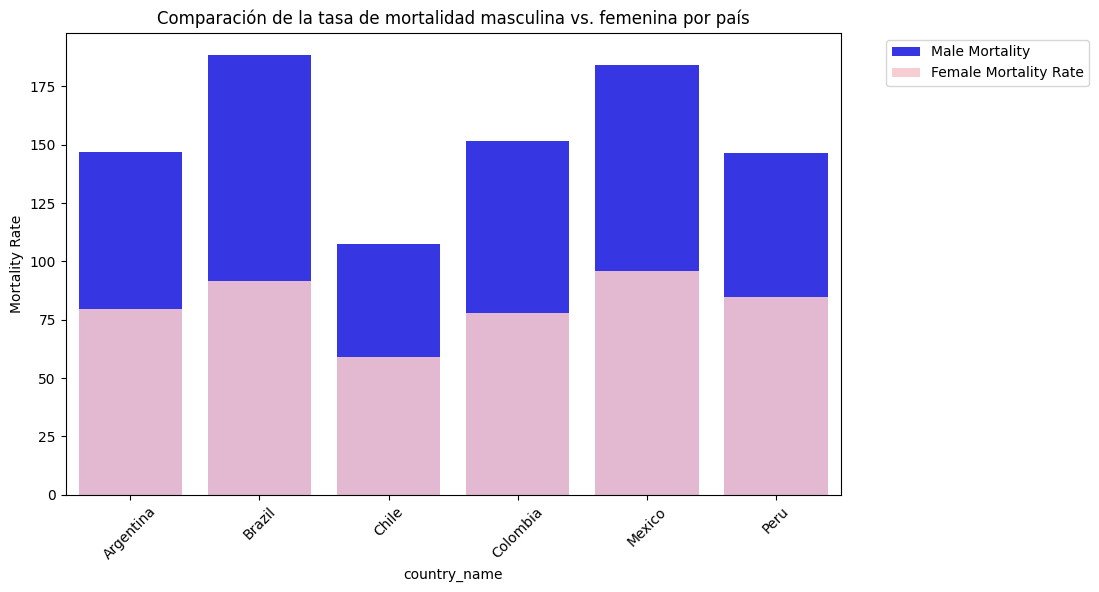

In [26]:
# Crear una figura de tamaño 10x6
plt.figure(figsize=(10, 6))

# Crear un gráfico de barras para la tasa de mortalidad masculina
sns.barplot(data=data, x='country_name', y='adult_male_mortality_rate', color='blue',alpha=0.9, label='Male Mortality')

# Crear un gráfico de barras para la tasa de mortalidad femenina (semi-transparente)
sns.barplot(data=data, x='country_name', y='adult_female_mortality_rate', color='pink', alpha=0.9, label='Female Mortality Rate')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Establecer etiquetas para los ejes y y el título del gráfico
plt.ylabel('Mortality Rate')
plt.title('Comparación de la tasa de mortalidad masculina vs. femenina por país')

# Agregar una leyenda en la esquina superior izquierda
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.show()

Matriz de correlación de indicadores demográficos y de salud.

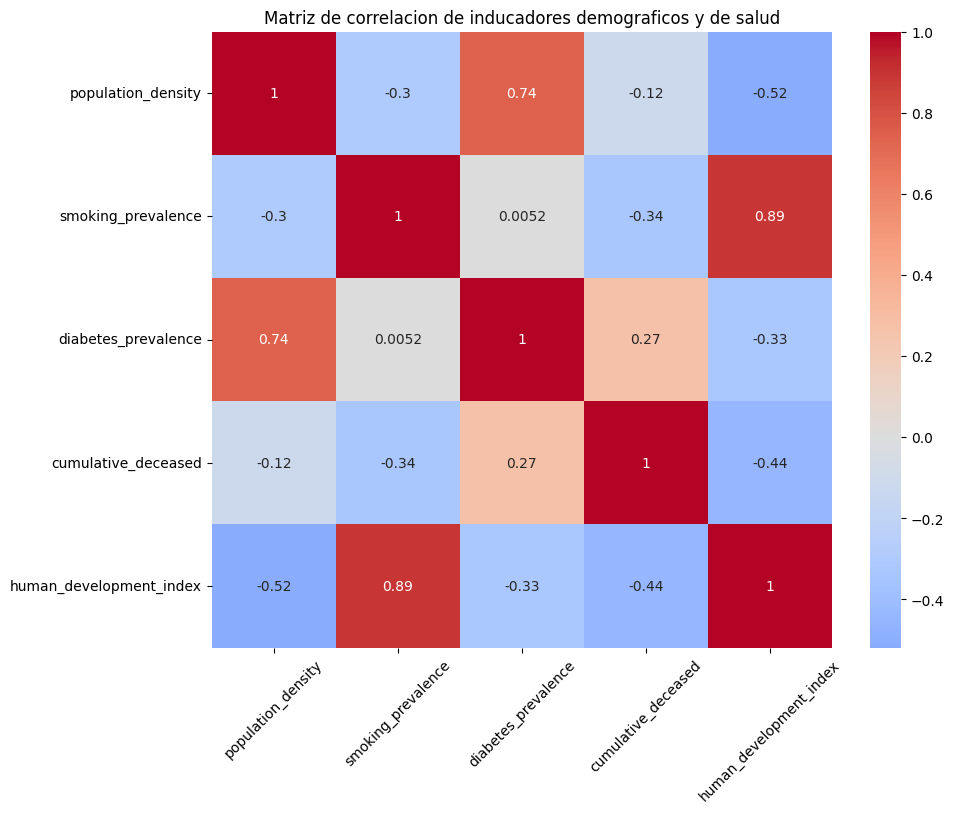

In [27]:
# Seleccionando un subconjunto de columnas para análisis de correlación
columns = ['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 'human_development_index']
correlation_matrix = data[columns].corr()

#Creamos la figura
plt.figure(figsize=(10, 8))

#Creamos la Grafica, titulo, rotacion de la etiqueta del eje x
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title ("Matriz de correlacion de inducadores demograficos y de salud")
plt.xticks(rotation=45)
plt.show()

 el tabaquismo y la diabetes son las enfermedades preexistentes más comunes en la población de los países analizados y, por lo tanto, son las que más probablemente han contribuido a las muertes en estos países.

Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

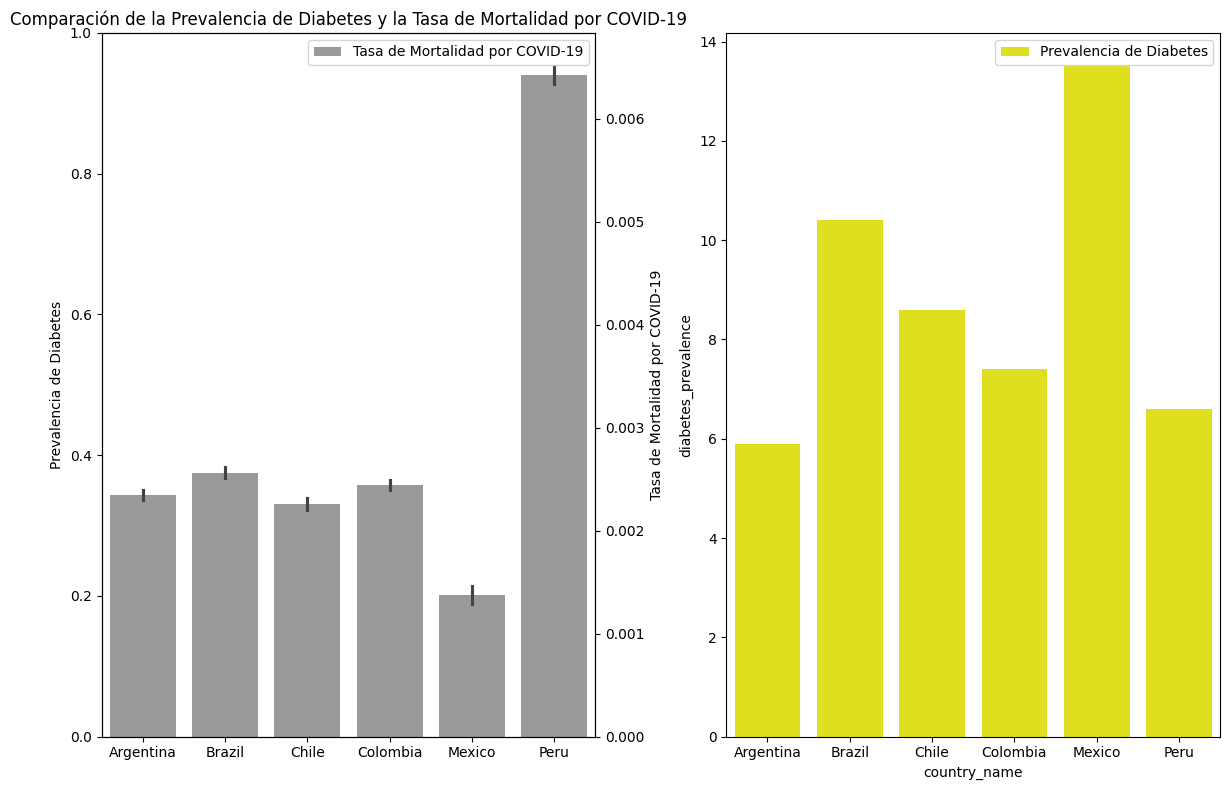

In [28]:
# Creamos una figura con dos subplots, uno al lado del otro
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 8))

# Primer gráfico: Prevalencia de Diabetes, grafico de barra
sns.barplot(data=data, x= data['country_name'], y= data['diabetes_prevalence'], color= "yellow", label = "Prevalencia de Diabetes")

# Segundo gráfico: Tasa de Mortalidad por COVID-19, creamos un segundo eje y para el mismo gráfico
ax2 = ax.twinx()

# Creamos otro gráfico de barras, pero con la tasa de mortalidad
sns.barplot(data=data, x= data['country_name'], y= data['cumulative_deceased'] / data["population"], color = "black", label= "Tasa de Mortalidad por COVID-19",ax=ax2, alpha=0.4)

# Personalizamos los gráficos
plt.xticks(rotation=90) # Rotamos las etiquetas del eje x para mejor visualización
ax.set_ylabel('Prevalencia de Diabetes')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()


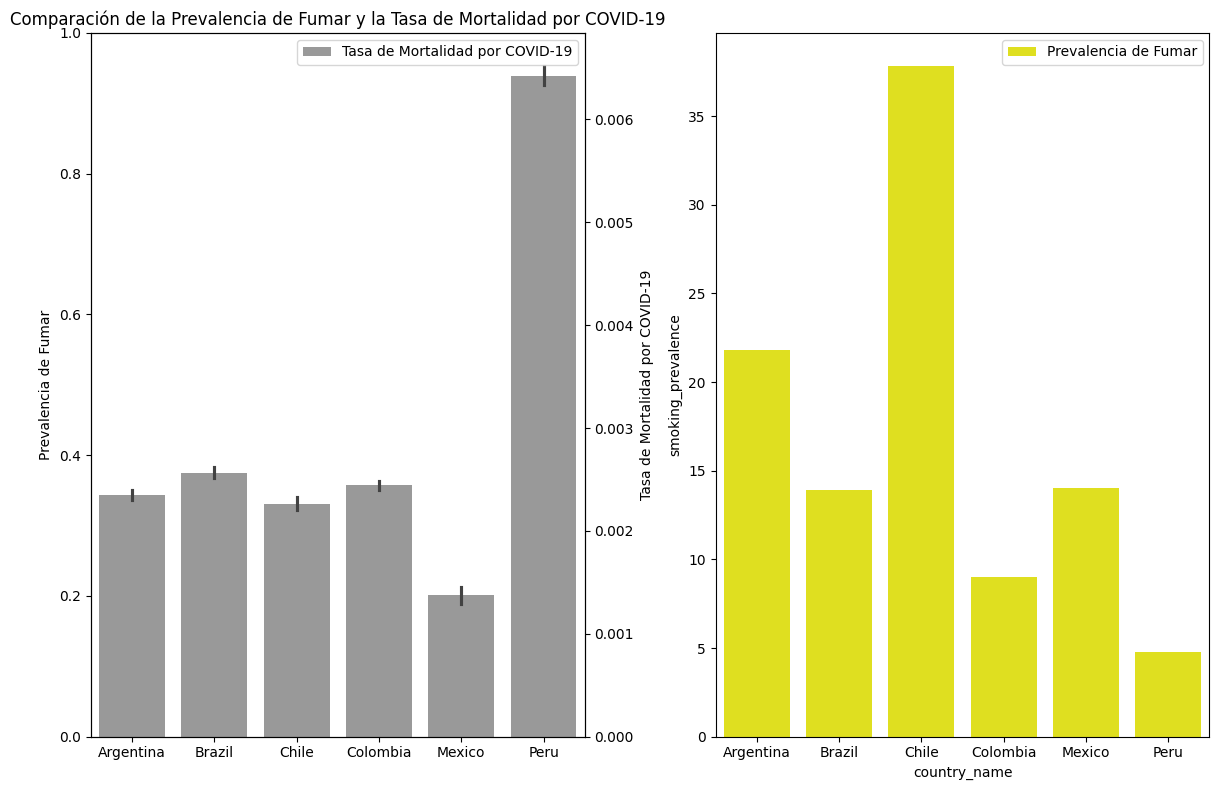

In [29]:
fig, (ax,ax2) = plt.subplots(1, 2, figsize=(12, 8))
sns.barplot(data=data, x= data['country_name'], y= data["smoking_prevalence"], color= "yellow", label = "Prevalencia de Fumar")
ax2 = ax.twinx()
sns.barplot(data=data, x= data['country_name'], y= data['cumulative_deceased'] / data["population"], color = "black", label= "Tasa de Mortalidad por COVID-19",ax=ax2, alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de Fumar')
ax2.set_ylabel('Tasa de Mortalidad por COVID-19')
plt.title('Comparación de la Prevalencia de Fumar y la Tasa de Mortalidad por COVID-19')
plt.tight_layout()
plt.show()

In [30]:
data.to_csv("Datos_Finales_Filtrados_Avence2.csv")

## **Avance 3**

In [31]:
data = pd.read_csv("Datos_Finales_Filtrados_Avence2.csv", sep=",")

In [32]:
data['date'] = pd.to_datetime(data['date'])

In [33]:
data.set_index ("date", inplace = True )

Evolución Semanal y Anual de Casos Nuevos

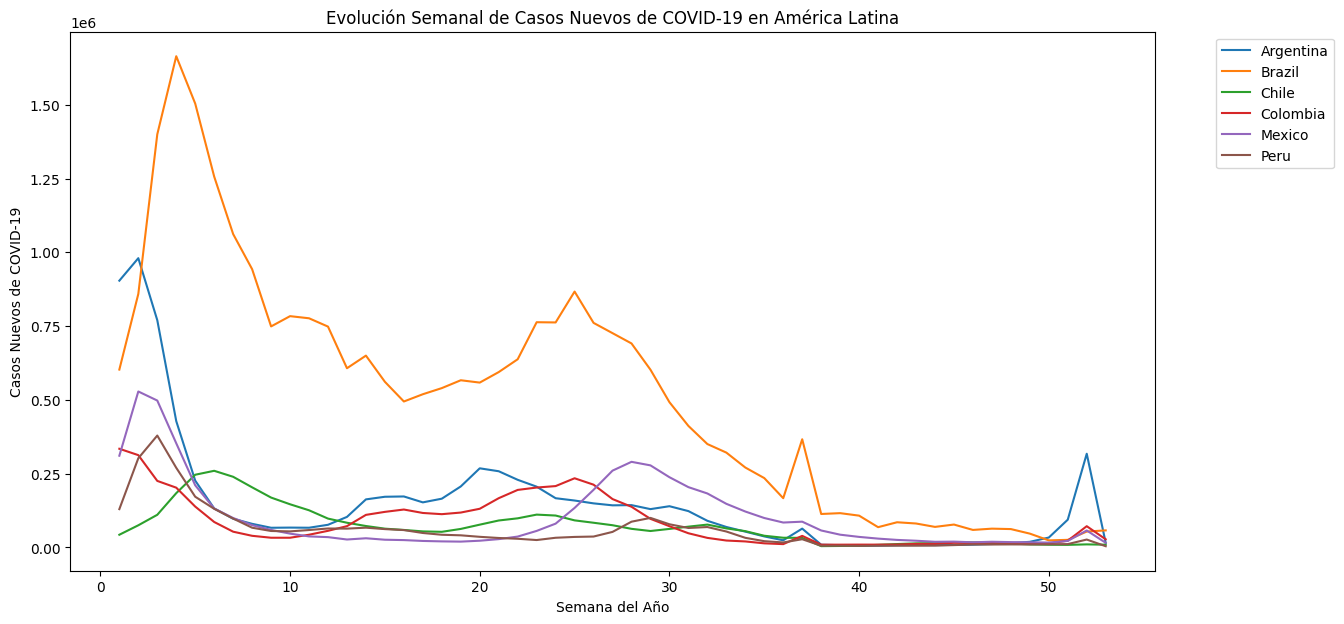

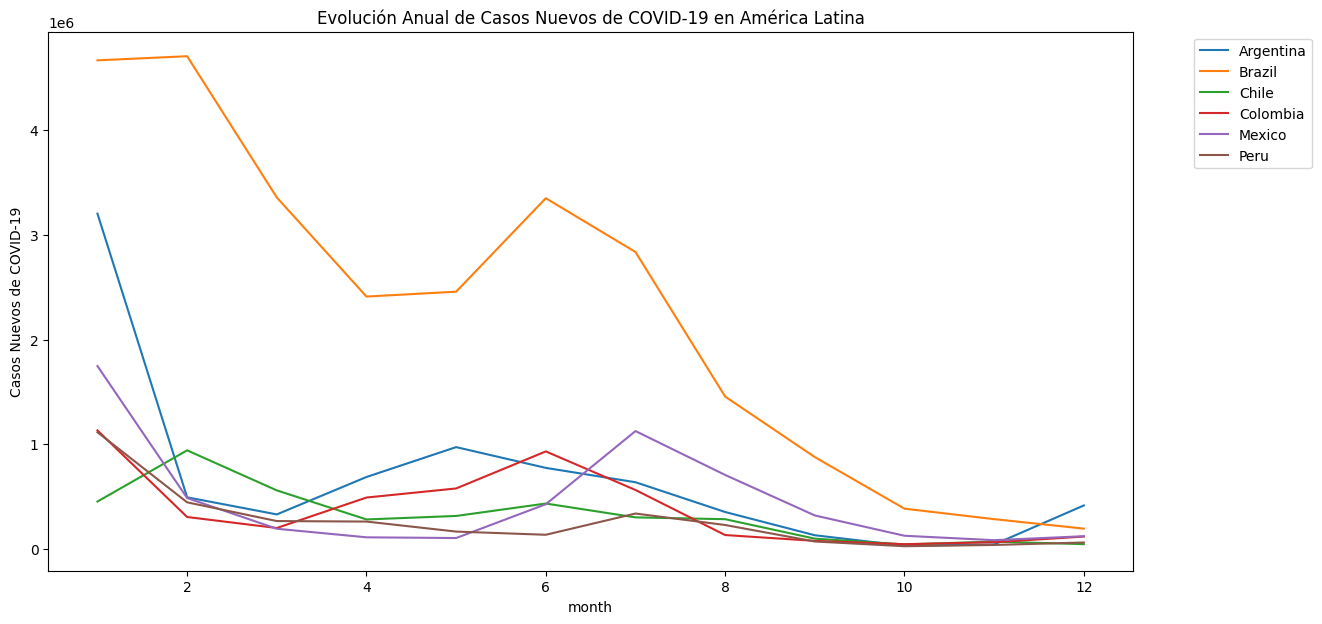

In [34]:
# Vamos a analizar como evolucionan los casos de COVID-19 en América Latina a lo largo del tiempo por semana

# Agregamos columnas para la semana y el año, utilizando el índice de fecha como referencia
data['week'] = data.index.isocalendar().week
data['year'] = data.index.isocalendar().year

# Agrupamos los datos por país y semana, sumando los nuevos casos confirmados y creando un nuevo DataFrame
weekly_cases = data.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()


plt.figure(figsize=(14, 7)) # Creamos una figura para el gráfico

for country in weekly_cases['country_name'].unique():    # Iteramos sobre cada país único en los datos
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]  # Filtramos los datos para el país actual
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country) # Creamos una línea en el gráfico para el país actual

plt.xlabel('Semana del Año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Semanal de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Ahora analizamos por año
# Creamos una nueva columna 'month' en el DataFrame que contiene el número del mes
data['month'] = data.index.month

# con Groupby, agrupamos los datos por país y mes, sumamos los casos nuevos confirmados por grupo
# y creamos un nuevo DataFrame llamado 'yearly_cases' para almacenar los resultados.
yearly_cases = data.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()

# Creamos una nueva figura con un tamaño específico
plt.figure(figsize=(14, 7))

# Filtramos los datos para obtener los casos de un país específico.
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]

     # Creamos una línea en el gráfico para el país actual, usando el mes como eje x, y el número de casos nuevos como eje y.
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)

#Personalizamos la grafica
plt.xlabel('month')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


En estas graficas podemos contatar que desde la fecha de inicio del analisis hasta el ultimo corte, los casos nuevos han ido
dismiunyendo atraves del tiempo con un pequeño pico de repunte en la ultima semana de los año que se puede deber a la temporada
navideña. 

Progreso de la vacunación por país

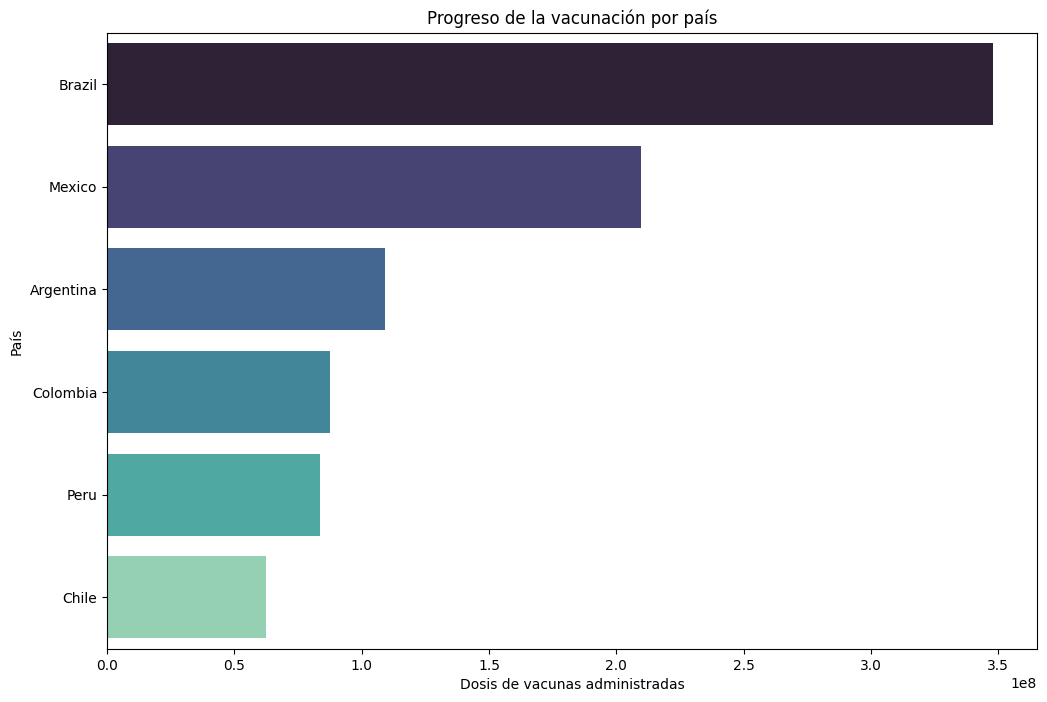

In [35]:
# Agrupamos los datos por país y calculamos la máxima cantidad de dosis de vacunas administradas
vaccination_data = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)


plt.figure(figsize=(12, 8))

# Creamos un gráfico de barras horizontal
sns.barplot(x=vaccination_data.values,  # eje x: valores de dosis de vacunas
            y=vaccination_data.index,   #eje y: los paises
            hue=vaccination_data.index, palette='mako')

# Personalimos graficos
plt.xlabel('Dosis de vacunas administradas')
plt.ylabel('País')
plt.title('Progreso de la vacunación por país')
plt.show()

Notamos que Brazil es el pais con mas dosis administradas esto tiene 2 lecturas: 1 que tiene una efectiva campaña de vacunacion y la otra es que necesitamos comparar la dosis de vacunacion con la poblacion de esta manera sabermos con mayor exactitud si tiene correlacion. 

Nuevos casos y temperatura promedio

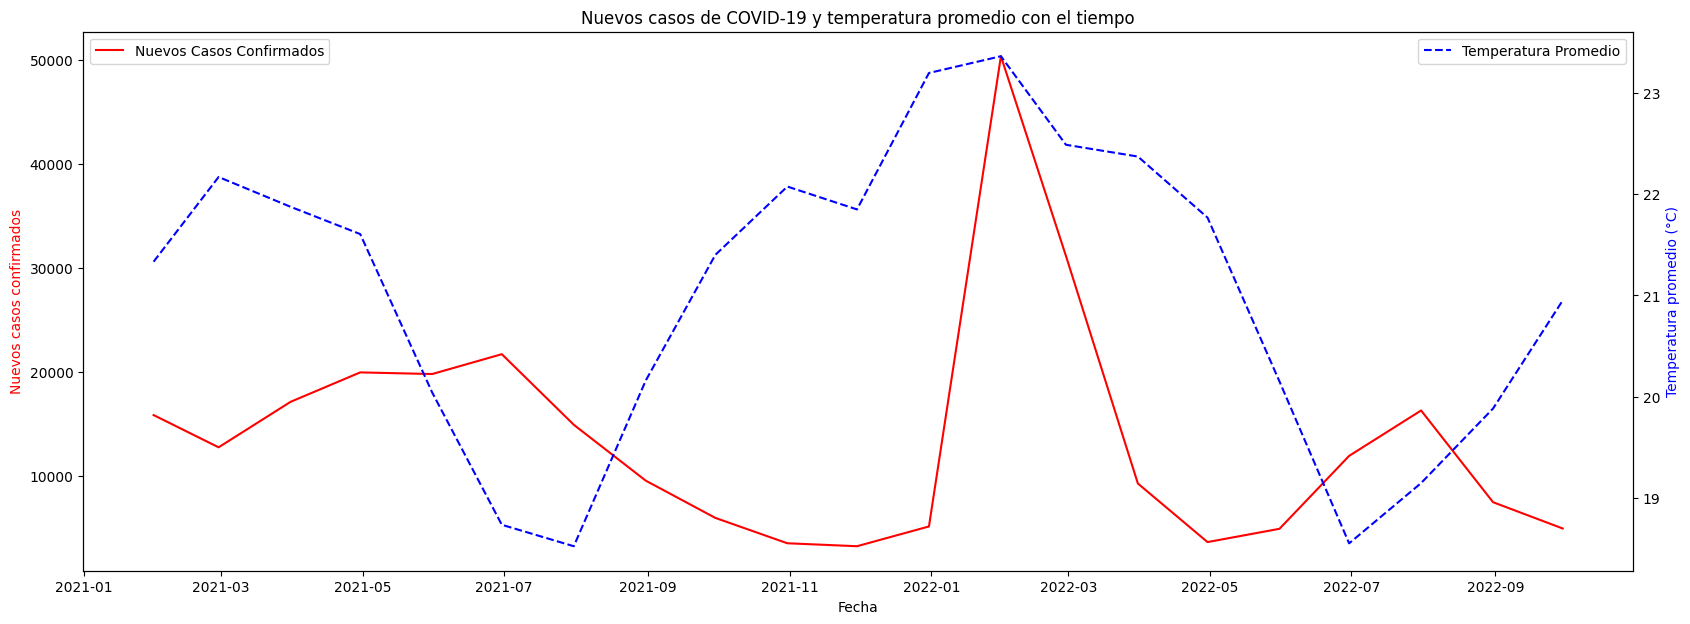

In [36]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

# Creamos una figura y optenemos el eje actual
plt.figure(figsize=(20, 7))
ax1 = plt.gca() 
ax2 = ax1.twinx()  # Creamos un segundo eje y que comparte el mismo eje x

# Graficamos los datos en ambos ejes
# Se asume que data_latinoamerica_paises es un DataFrame con datos de temperatura y casos
ax1.plot(data.resample('ME').mean(numeric_only=True).index,data.resample('ME').mean(numeric_only=True)["new_confirmed"], color="red", label="Nuevos Casos Confirmados" )
ax2.plot(data.resample('ME').mean(numeric_only=True).index,data.resample('ME').mean(numeric_only=True)["average_temperature_celsius"], color="blue", label="Temperatura Promedio", linestyle="--")

# Configuramos las etiquetas de los ejes
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (°C)', color='blue')

# Personalizamos el grafico
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

podemos apreciar ciertos picos de contagios pero tambien algunos valles esto puede responder a la cantidad de vacunas administradas y la temperatura se mantiene en valores estables. 

Impacto de la Urbanización en la Propagación del Covid-19  / FALTA CODIGO

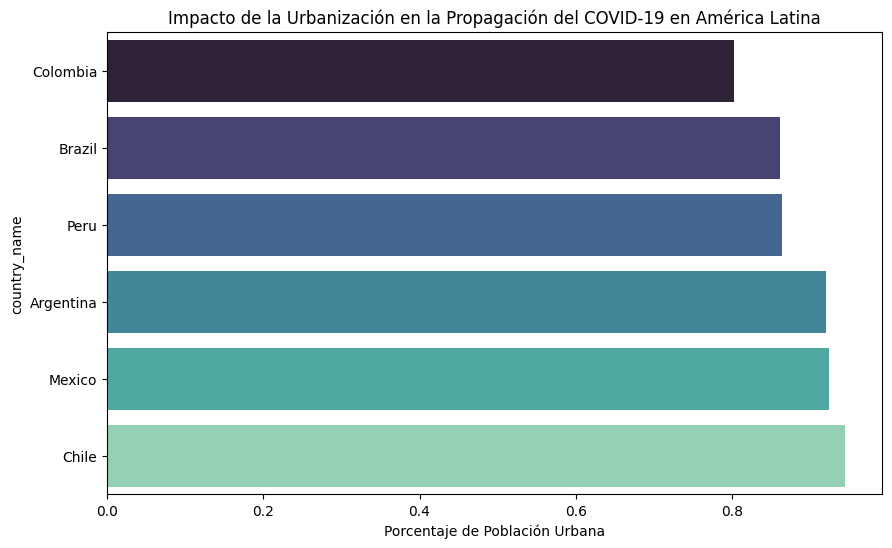

In [37]:

data['urban_population_percentage'] = data['population_urban'] / data['population'] # Calcula el porcentaje de población urbana para cada país
urban_cases = data.groupby('country_name').last().sort_values(by='urban_population_percentage') # Agrupa por país, toma el último registro y ordena por porcentaje de población urbana

# Crea una figura y crea un gráfico. El , el 
plt.figure(figsize=(10, 6))
sns.barplot(x=urban_cases['urban_population_percentage'],#eje x: porcentaje de población urbana
            y=urban_cases.index, hue=urban_cases.index, palette='mako') #eje y representa los países (ordenados por porcentaje de población urbana)

# Personalizo el gráfico
plt.xlabel('Porcentaje de Población Urbana')
plt.title('Impacto de la Urbanización en la Propagación del COVID-19 en América Latina')
plt.show()

Este gráfico sugiere que la mayoría de los países de América Latina presenta un alto grado de urbanización. Esto significa que una gran proporción de sus habitantes vive en ciudades. Las implicaciones que tiene esto con respecto al COVID-19 es que a mayor densidad poblacional existe un mayor riesgo de contagio, las ciudades suelen tener solidos sistemas de transporte publico facilitando de esta manera la propagacion del virus. 

Distribución de la Población por Edad en Países 

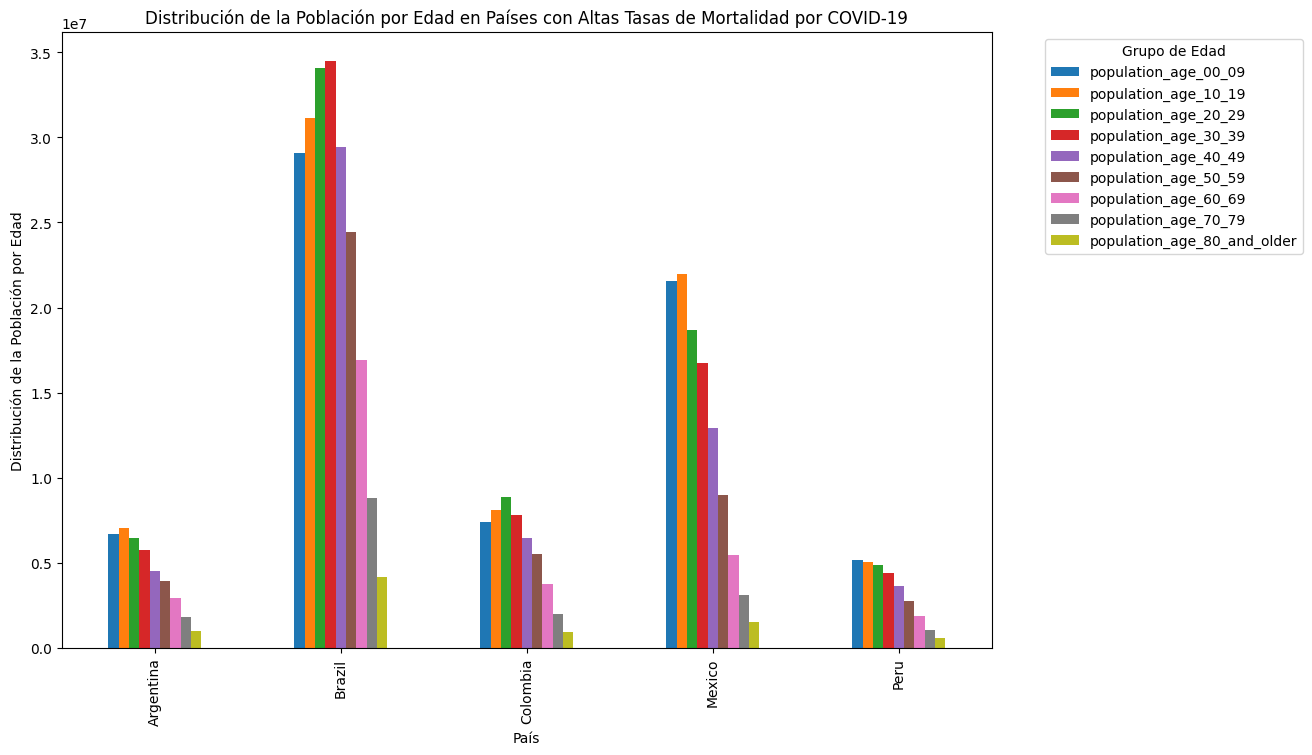

In [38]:
# Identifico los países con la mayor cantidad de fallecidos acumulados
high_mortality_countries = data.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index

# Define los grupos de edad
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'] 


# Filtra los datos para los países con alta mortalidad y agrupa por país y grupo de edad
age_distribution = data[data['country_name'].isin(high_mortality_countries)].groupby('country_name')[age_groups].mean()

# Crea un gráfico de barras apiladas
age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))
plt.xlabel('País')
plt.ylabel('Distribución de la Población por Edad')
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Grupo de Edad')
plt.show()

la gráfica muestra que la distribución por edades de la población varía entre los países de América Latina y puede tener implicaciones importantes para la gestión de la pandemia de COVID-19. Es fundamental considerar esta información al diseñar estrategias de prevención y control de la enfermedad.

Comparación de Estrategias de Vacunación en América Latina

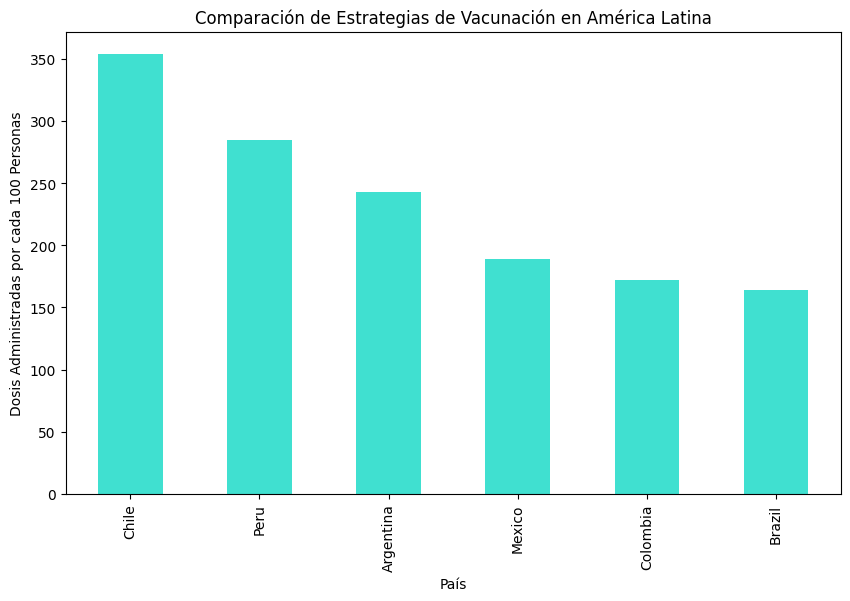

In [39]:
# Agrupamos los datos por país y calculamos el número máximo de dosis de vacuna administradas por país  (.max consigue el valor mas actual)
vaccination_strategy = data.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data.groupby('country_name')["population"].max()* 100

# Ordenamos los países de mayor a menor cantidad de dosis administradas y creamos un gráfico de barras
vaccination_strategy.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color="turquoise")

# Personalizamos el gráfico
plt.xlabel('País')  # Etiqueta para el eje x (nombre de los países)
plt.ylabel('Dosis Administradas por cada 100 Personas')  # Etiqueta para el eje y (número de dosis por cada 100 personas)
plt.title('Comparación de Estrategias de Vacunación en América Latina')  # Título del gráfico
plt.show()  # Mostramos el gráfico

aca se evidencia que Chile lidera las estadisticas de campaña de vacunacion cuando se lo compara con su poblacion, por el contrario Brazil esta en el ultimo puesto. esto quiere decir que no se ha investido lo suficiente en programas de vacunacion

Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad

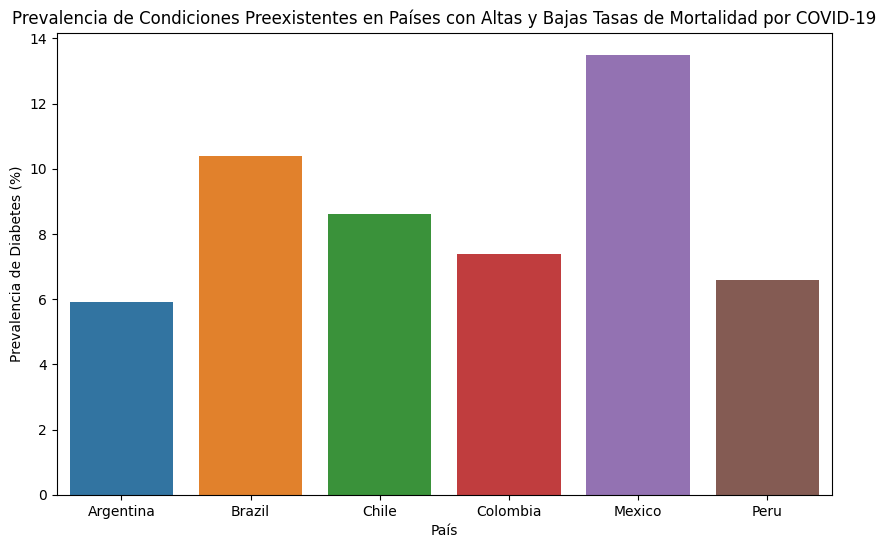

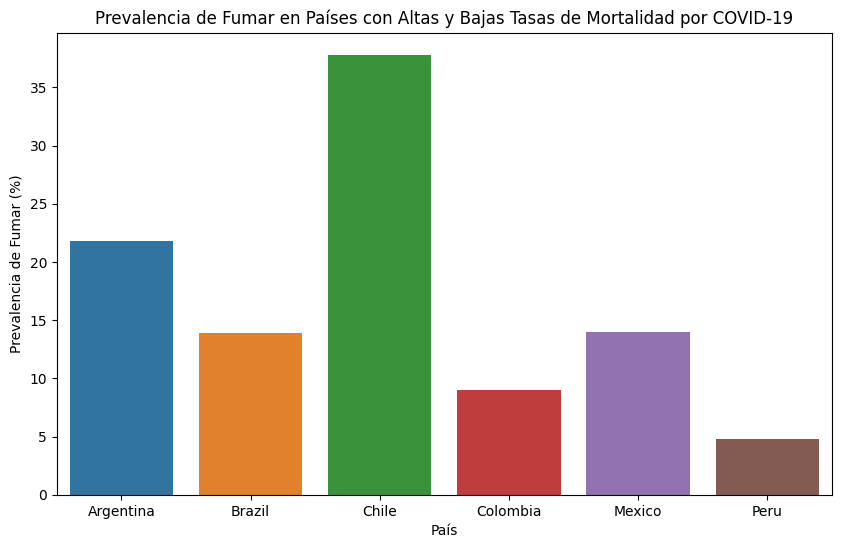

In [40]:
#PREVALENCIA DE DIABETES

# Identifica los países con las tasas más altas y más bajas de mortalidad por COVID-19
top_countries = data.groupby('country_name')['cumulative_deceased'].max().nlargest(3).index
bottom_countries = data.groupby('country_name')['cumulative_deceased'].max().nsmallest(3).index

# Filtra los datos para incluir solo los países con las tasas de mortalidad más altas y más bajas
conditions_data = data[data['country_name'].isin(top_countries.union(bottom_countries))]

# Crea un gráfico de barras para la prevalencia de diabetes
plt.figure(figsize=(10, 6))
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Diabetes (%)')
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

# Crea un gráfico de barras para la prevalencia de fumar
plt.figure(figsize=(10, 6))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()

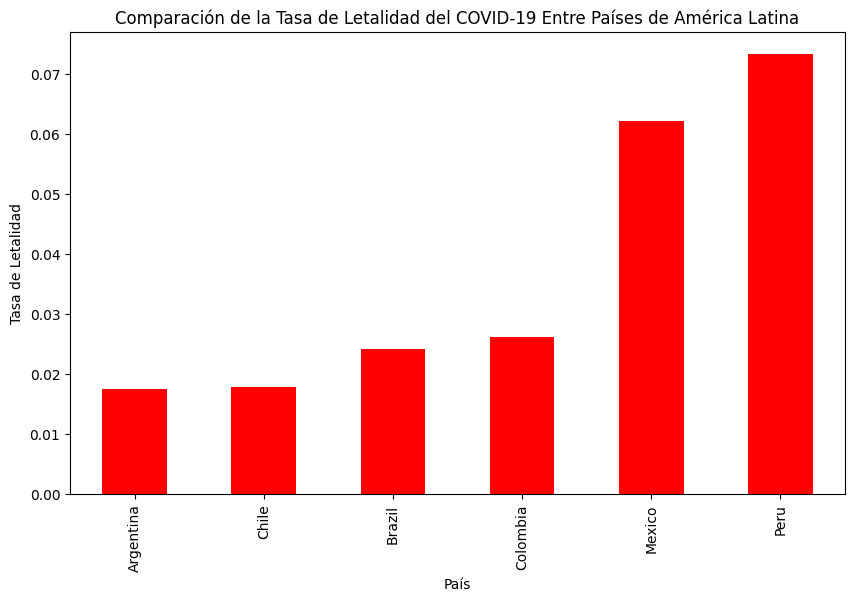

In [41]:
# Calcula la tasa de letalidad por país

# Dividir  fallecidos acumulados por el total de casos (suponiendo que data['data'] representa el total de casos)
data['case_fatality_rate'] = data['cumulative_deceased'] / data['cumulative_confirmed']

# Agrupamos los datos por país y tomamos el último valor de la tasa de letalidad (posiblemente para reflejar la situación más reciente)
# Luego, ordenamos los resultados de menor a mayor
fatality_rates = data.groupby('country_name')['case_fatality_rate'].last().sort_values()


plt.figure(figsize=(10, 6)) 
fatality_rates.plot(kind='bar', color='r')  # Crea un gráfico de barras, con las barras de color rojo 
plt.xlabel('País')  # Etiqueta para el eje x (nombre de los países)
plt.ylabel('Tasa de Letalidad')  # Etiqueta para el eje y (tasa de letalidad)
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')  # Título del gráfico
plt.show()

descripcion:

Relación entre la Cobertura de Vacunación y la Reducción de Casos

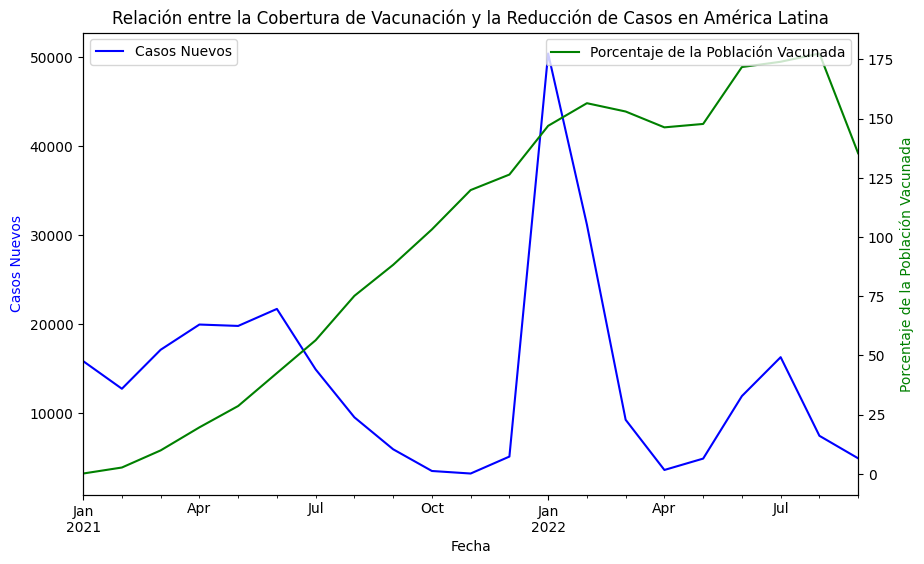

In [42]:
# Como evoluciona la vacunacion en america latina y la reduccion de casos de COVID-19


plt.figure(figsize=(10, 6)) 
ax1 = plt.gca()  # Obtiene el eje actual
ax2 = ax1.twinx()  # Crea un segundo eje que comparte el eje x con el primero

# Calcula el porcentaje de personas vacunadas
data['percentage_vaccinated'] = (data['cumulative_vaccine_doses_administered'] / data["population"])*100

# Agrupa los datos por mes y calcula el promedio de casos nuevos y porcentaje vacunado
data.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data.resample('ME').mean(numeric_only=True)['percentage_vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')

# Configura las etiquetas de los ejes
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')

# Título del gráfico
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')

# Ubica las leyendas de cada eje
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

Aunque no es una correlación perfecta, existe una tendencia general a que a medida que aumenta el porcentaje de población vacunada, disminuye el número de casos nuevos. Esto sugiere una relación negativa entre ambas variables, es decir, a mayor vacunación, menor número de casos.

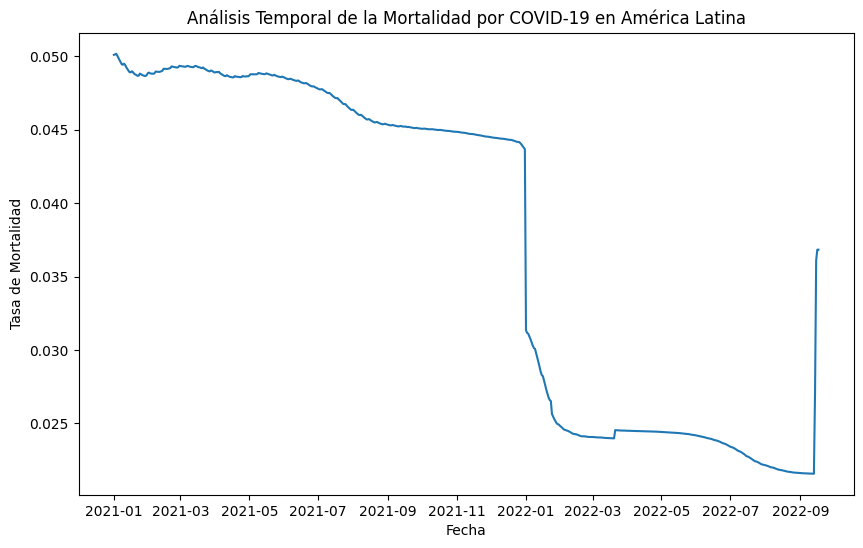

In [43]:
# Evolucion de la mortalidad

# Calcula la tasa de mortalidad como la proporción de fallecidos sobre el total de casos
data['mortality_rate'] = data['cumulative_deceased'] / data["cumulative_confirmed"]

plt.figure(figsize=(10,6))
sns.lineplot(data=data, x='date', y='mortality_rate', estimator='mean', errorbar=None)

# personalizacion del gráfico
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad')
plt.show()

La línea general del gráfico muestra una pendiente negativa, lo que indica una disminución en la tasa de mortalidad a medida que avanza el tiempo. Esto sugiere que las medidas de salud pública, el aumento de la vacunación y la inmunidad adquirida a través de infecciones previas han contribuido a reducir la severidad de la enfermedad.

Evolución de Casos Activos vs. Recuperados

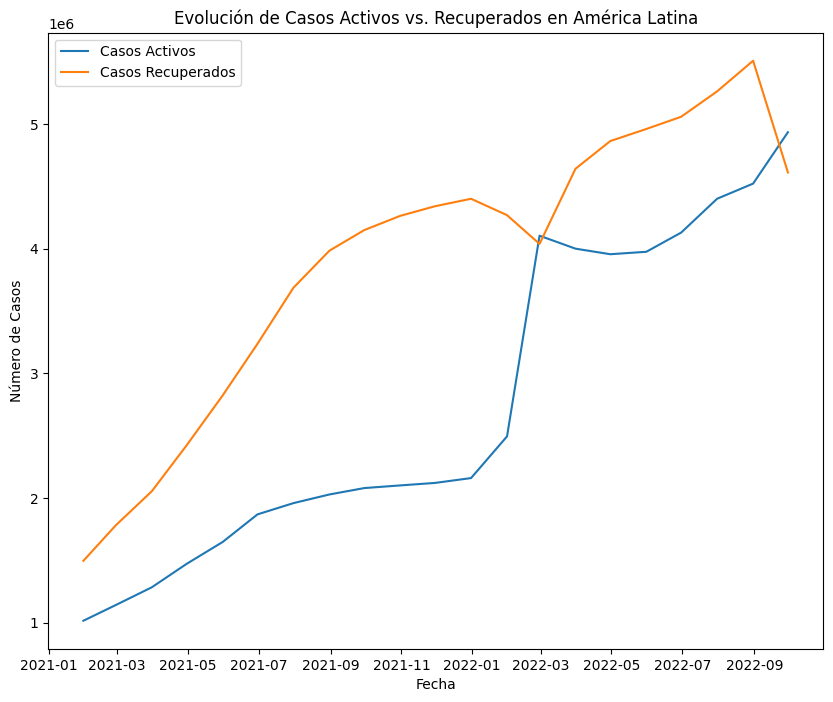

In [44]:
# Como evolucionan los casos activos y recuperados en América Latina

data['active_cases'] = data['cumulative_confirmed'] - data['cumulative_recovered'] - data["cumulative_deceased"]

plt.figure(figsize=(10, 8))

# Se crea un grafico de lineas,que comparten el eje x se reagrupan por mes ('ME'). 
# para 1er eje y tenemos el promedio de caos Activo, 2do eje y promedio de casos recuperados
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
sns.lineplot(data=data.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')

plt.xlabel('Fecha') #etiqueta del eje x como 'Fecha'.
plt.ylabel("Número de Casos")  #etiqueta del eje y como "Número de Casos".
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')  #titulo del grafico
plt.legend()  #leyenda del gráfico.
plt.show()


Aunque los casos activos aumentaron durante el período, el aumento en los casos recuperados indica que las medidas tomadas para controlar la pandemia fueron, en general, efectivas.

Comparación de la Situación Actual (Contexto de los datos)

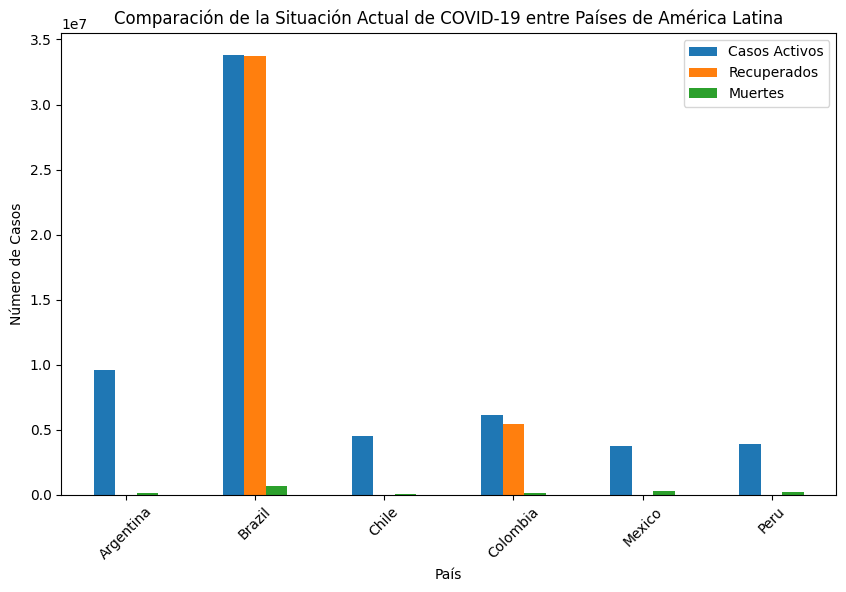

In [45]:
# tenemos muchos faltantes de datos en las columnas "cumulative_recovered" esto puede afectar el analisis. 

# Agrupamos los datos por país y tomamos el máximo valor para casos activos, recuperados y muertes
current_situation = data.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

 
current_situation.plot(kind='bar', stacked=False, figsize=(10, 6)) # Creamos un gráfico de barras
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina') # Personalizamos el gráfico
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor visualización
plt.show()

La ausencia de datos de recuperados para Argentina, Chile, México y Perú significa que no podemos determinar si estos países han gestionado bien la recuperación de pacientes o si simplemente no hay datos disponibles. Esto genera un sesgo en el análisis comparativo.

comparacion de la situcacion actual sin Brazil

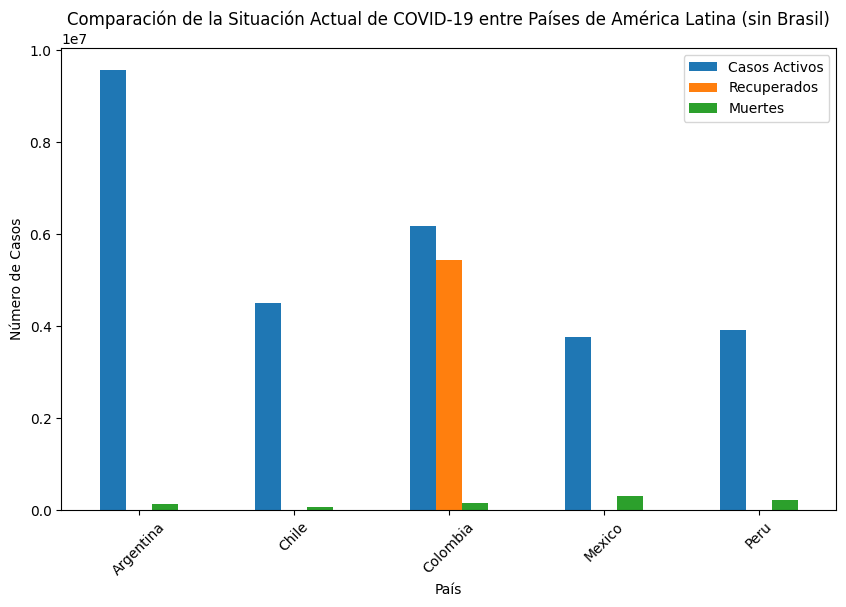

In [46]:
# Agrupamos los datos por país y tomamos el máximo valor para casos activos, recuperados y muertes
current_situation1 = data.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']]

# Filtramos los países para excluir a Brasil
countries_to_include = ['Colombia', 'Peru', 'Chile', 'Mexico', 'Argentina']
current_situation_filtered = current_situation1[current_situation1.index.isin(countries_to_include)]

# Creamos el gráfico de barras con los países seleccionados
current_situation_filtered.plot(kind='bar', stacked=False, figsize=(10, 6))

# Personalizamos el gráfico
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina (sin Brasil)')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend(['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje x para mejor visualización
plt.show()

aca mostramos exactamente la misma grafica de arriba pero excluimos a Brazil para pider mostrar de manera mas esfectiva la escala de valores, de igualmanera aclaramos que en nuestro dataframe no tenemos los valores de los recuperados siendo asi que no podamos dar una conclusion efectiva de la situacion 

In [47]:
data.to_csv("Datos_Finales_FiltradosAvance3.csv", index=True)

In [48]:
print(data.columns)

Index(['location_key', 'country_code', 'country_name', 'new_confirmed',
       'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered', 'population',
       'population_male', 'population_female', 'population_rural',
       'population_urban', 'population_density', 'human_development_index',
       'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older', 'gdp_usd', 'gdp_per_capita_usd',
       'latitude', 'longitude', 'area_sq_km', 'smoking_prevalence',
       'diabetes_prevalence', 'infant_mortality_rate', 'nurses_per_1000',
       'physicians_per_1000', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity', 'population_largest_city',
       'area_rural_sq_km', 